# Feature variation by substitution ($\nu_{\phi}$)

## 1 Setup

Flags and settings.

In [1]:
SAVE_FIGURES = False
PAPER_FEATURES = ['frequency', 'aoa', 'clustering', 'letters_count', 'synonyms_count',
                  'orthographical_density']
N_COMPONENTS = 3

Imports and database setup.

In [2]:
import pandas as pd
import seaborn as sb
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from progressbar import ProgressBar

%cd -q ..
from brainscopypaste.conf import settings
%cd -q notebooks
from brainscopypaste.mine import Model, Time, Source, Past, Durl
from brainscopypaste.db import Substitution
from brainscopypaste.utils import init_db, session_scope
engine = init_db()

## 2 Variation of features upon substitution

First build our data.

In [3]:
model = Model(time=Time.discrete, source=Source.all, past=Past.last_bin, durl=Durl.all)
data = []

with session_scope() as session:
    substitutions = session.query(Substitution.id).filter(Substitution.model == model)
    print("Got {} substitutions for model {}".format(substitutions.count(), model))
    substitution_ids = [id for (id,) in substitutions]

for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for feature in Substitution.__features__:
            source, destination = substitution.features(feature)
            source_rel, destination_rel = substitution.features(feature,
                                                                sentence_relative='median')
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'feature': feature,
                         'source': source,
                         'source_rel': source_rel,
                         'destination': destination,
                         'destination_rel': destination_rel,
                         'h0': substitution.feature_average(feature),
                         'h0_rel': substitution.feature_average(feature,
                                                                sentence_relative='median'),
                         'h0n': substitution.feature_average(feature,
                                                             source_synonyms=True),
                         'h0n_rel': substitution.feature_average(feature,
                                                                 source_synonyms=True,
                                                                 sentence_relative='median')})

original_variations = pd.DataFrame(data)
del data

Got 37155 substitutions for model Model(time=Time.discrete, source=Source.all, past=Past.last_bin, durl=Durl.all)


  0% (    1 of 37155) |          | Elapsed Time: 0:00:28 ETA:  12 days, 11:08:09

  0% (   72 of 37155) |                    | Elapsed Time: 0:00:29 ETA:  0:08:15

  0% (  138 of 37155) |                    | Elapsed Time: 0:00:30 ETA:  0:08:35

  0% (  204 of 37155) |                    | Elapsed Time: 0:00:32 ETA:  0:08:42

  0% (  269 of 37155) |                    | Elapsed Time: 0:00:33 ETA:  0:08:45

  0% (  334 of 37155) |                    | Elapsed Time: 0:00:34 ETA:  0:08:48

  1% (  399 of 37155) |                    | Elapsed Time: 0:00:35 ETA:  0:08:49

  1% (  465 of 37155) |                    | Elapsed Time: 0:00:36 ETA:  0:08:47

  1% (  478 of 37155) |                    | Elapsed Time: 0:00:37 ETA:  0:09:50

  1% (  547 of 37155) |                    | Elapsed Time: 0:00:38 ETA:  0:09:37

  1% (  618 of 37155) |                    | Elapsed Time: 0:00:39 ETA:  0:09:36

  1% (  691 of 37155) |                    | Elapsed Time: 0:00:40 ETA:  0:09:28

  2% (  760 of 37155) |                    | Elapsed Time: 0:00:41 ETA:  0:09:23

  2% (  830 of 37155) |                    | Elapsed Time: 0:00:42 ETA:  0:09:17

  2% (  898 of 37155) |                    | Elapsed Time: 0:00:43 ETA:  0:09:13

  2% (  929 of 37155) |                    | Elapsed Time: 0:00:43 ETA:  0:09:14

  2% (  986 of 37155) |                    | Elapsed Time: 0:00:44 ETA:  0:09:24

  2% ( 1057 of 37155) |                    | Elapsed Time: 0:00:45 ETA:  0:08:22

  3% ( 1129 of 37155) |                    | Elapsed Time: 0:00:46 ETA:  0:08:18

  3% ( 1201 of 37155) |                    | Elapsed Time: 0:00:47 ETA:  0:08:16

  3% ( 1275 of 37155) |                    | Elapsed Time: 0:00:48 ETA:  0:08:14

  3% ( 1346 of 37155) |                    | Elapsed Time: 0:00:49 ETA:  0:08:12

  3% ( 1394 of 37155) |                    | Elapsed Time: 0:00:50 ETA:  0:08:11

  3% ( 1454 of 37155) |                    | Elapsed Time: 0:00:51 ETA:  0:08:18

  4% ( 1512 of 37155) |                    | Elapsed Time: 0:00:52 ETA:  0:08:24

  4% ( 1566 of 37155) |                    | Elapsed Time: 0:00:53 ETA:  0:08:27

  4% ( 1626 of 37155) |                    | Elapsed Time: 0:00:54 ETA:  0:08:36

  4% ( 1686 of 37155) |                    | Elapsed Time: 0:00:55 ETA:  0:08:47

  4% ( 1744 of 37155) |                    | Elapsed Time: 0:00:56 ETA:  0:09:02

  4% ( 1803 of 37155) |                    | Elapsed Time: 0:00:57 ETA:  0:09:17

  5% ( 1858 of 37155) |#                   | Elapsed Time: 0:00:58 ETA:  0:09:49

  5% ( 1923 of 37155) |#                   | Elapsed Time: 0:00:59 ETA:  0:09:40

  5% ( 1987 of 37155) |#                   | Elapsed Time: 0:01:00 ETA:  0:09:31

  5% ( 2051 of 37155) |#                   | Elapsed Time: 0:01:01 ETA:  0:09:17

  5% ( 2119 of 37155) |#                   | Elapsed Time: 0:01:02 ETA:  0:09:06

  5% ( 2186 of 37155) |#                   | Elapsed Time: 0:01:03 ETA:  0:08:56

  6% ( 2248 of 37155) |#                   | Elapsed Time: 0:01:04 ETA:  0:08:50

  6% ( 2323 of 37155) |#                   | Elapsed Time: 0:01:05 ETA:  0:08:17

  6% ( 2398 of 37155) |#                   | Elapsed Time: 0:01:06 ETA:  0:08:06

  6% ( 2471 of 37155) |#                   | Elapsed Time: 0:01:07 ETA:  0:07:58

  6% ( 2544 of 37155) |#                   | Elapsed Time: 0:01:08 ETA:  0:07:48

  7% ( 2619 of 37155) |#                   | Elapsed Time: 0:01:09 ETA:  0:07:36

  7% ( 2695 of 37155) |#                   | Elapsed Time: 0:01:10 ETA:  0:07:28

  7% ( 2771 of 37155) |#                   | Elapsed Time: 0:01:11 ETA:  0:07:20

  7% ( 2787 of 37155) |#                   | Elapsed Time: 0:01:11 ETA:  0:07:08

  7% ( 2864 of 37155) |#                   | Elapsed Time: 0:01:12 ETA:  0:07:05

  7% ( 2935 of 37155) |#                   | Elapsed Time: 0:01:13 ETA:  0:07:07

  8% ( 2998 of 37155) |#                   | Elapsed Time: 0:01:14 ETA:  0:07:16

  8% ( 3063 of 37155) |#                   | Elapsed Time: 0:01:15 ETA:  0:07:21

  8% ( 3136 of 37155) |#                   | Elapsed Time: 0:01:16 ETA:  0:07:21

  8% ( 3211 of 37155) |#                   | Elapsed Time: 0:01:17 ETA:  0:07:20

  8% ( 3252 of 37155) |#                   | Elapsed Time: 0:01:18 ETA:  0:07:24

  8% ( 3325 of 37155) |#                   | Elapsed Time: 0:01:19 ETA:  0:07:26

  9% ( 3390 of 37155) |#                   | Elapsed Time: 0:01:20 ETA:  0:07:32

  9% ( 3442 of 37155) |#                   | Elapsed Time: 0:01:21 ETA:  0:07:55

  9% ( 3470 of 37155) |#                   | Elapsed Time: 0:01:22 ETA:  0:09:16

  9% ( 3523 of 37155) |#                   | Elapsed Time: 0:01:23 ETA:  0:09:27

  9% ( 3578 of 37155) |#                   | Elapsed Time: 0:01:24 ETA:  0:09:39

  9% ( 3629 of 37155) |#                   | Elapsed Time: 0:01:25 ETA:  0:10:08

  9% ( 3683 of 37155) |#                   | Elapsed Time: 0:01:26 ETA:  0:10:38

 10% ( 3716 of 37155) |##                  | Elapsed Time: 0:01:27 ETA:  0:10:49

 10% ( 3792 of 37155) |##                  | Elapsed Time: 0:01:28 ETA:  0:10:43

 10% ( 3859 of 37155) |##                  | Elapsed Time: 0:01:29 ETA:  0:10:38

 10% ( 3919 of 37155) |##                  | Elapsed Time: 0:01:30 ETA:  0:10:23

 10% ( 3982 of 37155) |##                  | Elapsed Time: 0:01:31 ETA:  0:08:55

 10% ( 4044 of 37155) |##                  | Elapsed Time: 0:01:32 ETA:  0:08:43

 11% ( 4101 of 37155) |##                  | Elapsed Time: 0:01:33 ETA:  0:08:40

 11% ( 4180 of 37155) |##                  | Elapsed Time: 0:01:34 ETA:  0:08:07

 11% ( 4244 of 37155) |##                  | Elapsed Time: 0:01:35 ETA:  0:08:01

 11% ( 4310 of 37155) |##                  | Elapsed Time: 0:01:36 ETA:  0:08:12

 11% ( 4377 of 37155) |##                  | Elapsed Time: 0:01:37 ETA:  0:08:11

 11% ( 4438 of 37155) |##                  | Elapsed Time: 0:01:38 ETA:  0:08:09

 12% ( 4504 of 37155) |##                  | Elapsed Time: 0:01:39 ETA:  0:08:05

 12% ( 4570 of 37155) |##                  | Elapsed Time: 0:01:40 ETA:  0:07:59

 12% ( 4645 of 37155) |##                  | Elapsed Time: 0:01:41 ETA:  0:07:52

 12% ( 4712 of 37155) |##                  | Elapsed Time: 0:01:42 ETA:  0:07:50

 12% ( 4778 of 37155) |##                  | Elapsed Time: 0:01:43 ETA:  0:07:47

 13% ( 4845 of 37155) |##                  | Elapsed Time: 0:01:44 ETA:  0:07:45

 13% ( 4912 of 37155) |##                  | Elapsed Time: 0:01:45 ETA:  0:07:43

 13% ( 4977 of 37155) |##                  | Elapsed Time: 0:01:46 ETA:  0:07:38

 13% ( 5044 of 37155) |##                  | Elapsed Time: 0:01:47 ETA:  0:07:36

 13% ( 5109 of 37155) |##                  | Elapsed Time: 0:01:48 ETA:  0:07:35

 13% ( 5173 of 37155) |##                  | Elapsed Time: 0:01:49 ETA:  0:07:36

 14% ( 5240 of 37155) |##                  | Elapsed Time: 0:01:50 ETA:  0:07:35

 14% ( 5306 of 37155) |##                  | Elapsed Time: 0:01:51 ETA:  0:07:34

 14% ( 5372 of 37155) |##                  | Elapsed Time: 0:01:52 ETA:  0:07:32

 14% ( 5439 of 37155) |##                  | Elapsed Time: 0:01:53 ETA:  0:07:31

 14% ( 5507 of 37155) |##                  | Elapsed Time: 0:01:54 ETA:  0:07:30

 15% ( 5574 of 37155) |###                 | Elapsed Time: 0:01:55 ETA:  0:07:26

 15% ( 5641 of 37155) |###                 | Elapsed Time: 0:01:56 ETA:  0:07:25

 15% ( 5708 of 37155) |###                 | Elapsed Time: 0:01:57 ETA:  0:07:24

 15% ( 5774 of 37155) |###                 | Elapsed Time: 0:01:58 ETA:  0:07:21

 15% ( 5837 of 37155) |###                 | Elapsed Time: 0:01:59 ETA:  0:07:23

 15% ( 5903 of 37155) |###                 | Elapsed Time: 0:02:01 ETA:  0:07:23

 16% ( 5969 of 37155) |###                 | Elapsed Time: 0:02:02 ETA:  0:07:22

 16% ( 6038 of 37155) |###                 | Elapsed Time: 0:02:03 ETA:  0:07:23

 16% ( 6104 of 37155) |###                 | Elapsed Time: 0:02:04 ETA:  0:07:24

 16% ( 6171 of 37155) |###                 | Elapsed Time: 0:02:05 ETA:  0:07:23

 16% ( 6242 of 37155) |###                 | Elapsed Time: 0:02:06 ETA:  0:07:18

 16% ( 6312 of 37155) |###                 | Elapsed Time: 0:02:07 ETA:  0:07:13

 17% ( 6376 of 37155) |###                 | Elapsed Time: 0:02:08 ETA:  0:07:11

 17% ( 6448 of 37155) |###                 | Elapsed Time: 0:02:09 ETA:  0:07:04

 17% ( 6503 of 37155) |###                 | Elapsed Time: 0:02:09 ETA:  0:07:01

 17% ( 6563 of 37155) |###                 | Elapsed Time: 0:02:10 ETA:  0:07:07

 17% ( 6619 of 37155) |###                 | Elapsed Time: 0:02:11 ETA:  0:07:16

 18% ( 6688 of 37155) |###                 | Elapsed Time: 0:02:12 ETA:  0:07:12

 18% ( 6755 of 37155) |###                 | Elapsed Time: 0:02:13 ETA:  0:07:10

 18% ( 6822 of 37155) |###                 | Elapsed Time: 0:02:14 ETA:  0:07:13

 18% ( 6890 of 37155) |###                 | Elapsed Time: 0:02:15 ETA:  0:07:13

 18% ( 6967 of 37155) |###                 | Elapsed Time: 0:02:17 ETA:  0:07:16

 18% ( 7035 of 37155) |###                 | Elapsed Time: 0:02:18 ETA:  0:07:15

 19% ( 7098 of 37155) |###                 | Elapsed Time: 0:02:19 ETA:  0:07:11

 19% ( 7162 of 37155) |###                 | Elapsed Time: 0:02:20 ETA:  0:07:02

 19% ( 7199 of 37155) |###                 | Elapsed Time: 0:02:22 ETA:  0:08:44

 19% ( 7265 of 37155) |###                 | Elapsed Time: 0:02:23 ETA:  0:08:45

 19% ( 7330 of 37155) |###                 | Elapsed Time: 0:02:24 ETA:  0:08:47

 19% ( 7397 of 37155) |###                 | Elapsed Time: 0:02:25 ETA:  0:08:48

 20% ( 7431 of 37155) |####                | Elapsed Time: 0:02:25 ETA:  0:09:05

 20% ( 7486 of 37155) |####                | Elapsed Time: 0:02:26 ETA:  0:09:05

 20% ( 7560 of 37155) |####                | Elapsed Time: 0:02:27 ETA:  0:08:55

 20% ( 7634 of 37155) |####                | Elapsed Time: 0:02:28 ETA:  0:08:41

 20% ( 7708 of 37155) |####                | Elapsed Time: 0:02:29 ETA:  0:08:27

 20% ( 7781 of 37155) |####                | Elapsed Time: 0:02:30 ETA:  0:06:45

 21% ( 7847 of 37155) |####                | Elapsed Time: 0:02:31 ETA:  0:06:44

 21% ( 7896 of 37155) |####                | Elapsed Time: 0:02:32 ETA:  0:06:37

 21% ( 7971 of 37155) |####                | Elapsed Time: 0:02:33 ETA:  0:06:28

 21% ( 8042 of 37155) |####                | Elapsed Time: 0:02:34 ETA:  0:06:17

 21% ( 8113 of 37155) |####                | Elapsed Time: 0:02:35 ETA:  0:06:03

 22% ( 8186 of 37155) |####                | Elapsed Time: 0:02:36 ETA:  0:06:03

 22% ( 8255 of 37155) |####                | Elapsed Time: 0:02:37 ETA:  0:06:06

 22% ( 8325 of 37155) |####                | Elapsed Time: 0:02:38 ETA:  0:06:08

 22% ( 8360 of 37155) |####                | Elapsed Time: 0:02:39 ETA:  0:06:11

 22% ( 8435 of 37155) |####                | Elapsed Time: 0:02:40 ETA:  0:06:02

 22% ( 8505 of 37155) |####                | Elapsed Time: 0:02:41 ETA:  0:06:02

 23% ( 8575 of 37155) |####                | Elapsed Time: 0:02:42 ETA:  0:06:05

 23% ( 8645 of 37155) |####                | Elapsed Time: 0:02:43 ETA:  0:06:05

 23% ( 8713 of 37155) |####                | Elapsed Time: 0:02:44 ETA:  0:06:07

 23% ( 8780 of 37155) |####                | Elapsed Time: 0:02:45 ETA:  0:06:12

 23% ( 8825 of 37155) |####                | Elapsed Time: 0:02:45 ETA:  0:06:10

 23% ( 8893 of 37155) |####                | Elapsed Time: 0:02:46 ETA:  0:06:12

 24% ( 8963 of 37155) |####                | Elapsed Time: 0:02:47 ETA:  0:06:09

 24% ( 9032 of 37155) |####                | Elapsed Time: 0:02:48 ETA:  0:06:14

 24% ( 9093 of 37155) |####                | Elapsed Time: 0:02:49 ETA:  0:06:21

 24% ( 9158 of 37155) |####                | Elapsed Time: 0:02:50 ETA:  0:06:25

 24% ( 9223 of 37155) |####                | Elapsed Time: 0:02:51 ETA:  0:06:29

 25% ( 9289 of 37155) |#####               | Elapsed Time: 0:02:52 ETA:  0:06:36

 25% ( 9357 of 37155) |#####               | Elapsed Time: 0:02:53 ETA:  0:06:36

 25% ( 9426 of 37155) |#####               | Elapsed Time: 0:02:54 ETA:  0:06:33

 25% ( 9493 of 37155) |#####               | Elapsed Time: 0:02:55 ETA:  0:06:35

 25% ( 9560 of 37155) |#####               | Elapsed Time: 0:02:56 ETA:  0:06:36

 25% ( 9629 of 37155) |#####               | Elapsed Time: 0:02:58 ETA:  0:06:27

 26% ( 9698 of 37155) |#####               | Elapsed Time: 0:02:59 ETA:  0:06:21

 26% ( 9754 of 37155) |#####               | Elapsed Time: 0:02:59 ETA:  0:06:16

 26% ( 9822 of 37155) |#####               | Elapsed Time: 0:03:00 ETA:  0:06:07

 26% ( 9888 of 37155) |#####               | Elapsed Time: 0:03:01 ETA:  0:06:08

 26% ( 9960 of 37155) |#####               | Elapsed Time: 0:03:02 ETA:  0:06:03

 27% (10034 of 37155) |#####               | Elapsed Time: 0:03:03 ETA:  0:05:58

 27% (10105 of 37155) |#####               | Elapsed Time: 0:03:04 ETA:  0:05:54

 27% (10161 of 37155) |#####               | Elapsed Time: 0:03:05 ETA:  0:06:03

 27% (10218 of 37155) |#####               | Elapsed Time: 0:03:06 ETA:  0:06:20

 27% (10271 of 37155) |#####               | Elapsed Time: 0:03:07 ETA:  0:06:36

 27% (10334 of 37155) |#####               | Elapsed Time: 0:03:08 ETA:  0:06:41

 28% (10406 of 37155) |#####               | Elapsed Time: 0:03:10 ETA:  0:06:34

 28% (10469 of 37155) |#####               | Elapsed Time: 0:03:11 ETA:  0:06:43

 28% (10536 of 37155) |#####               | Elapsed Time: 0:03:12 ETA:  0:06:50

 28% (10598 of 37155) |#####               | Elapsed Time: 0:03:13 ETA:  0:07:00

 28% (10657 of 37155) |#####               | Elapsed Time: 0:03:14 ETA:  0:06:56

 28% (10683 of 37155) |#####               | Elapsed Time: 0:03:14 ETA:  0:06:49

 28% (10735 of 37155) |#####               | Elapsed Time: 0:03:15 ETA:  0:07:00

 29% (10806 of 37155) |#####               | Elapsed Time: 0:03:16 ETA:  0:06:38

 29% (10868 of 37155) |#####               | Elapsed Time: 0:03:17 ETA:  0:06:38

 29% (10932 of 37155) |#####               | Elapsed Time: 0:03:18 ETA:  0:06:45

 29% (10997 of 37155) |#####               | Elapsed Time: 0:03:19 ETA:  0:06:42

 29% (11055 of 37155) |#####               | Elapsed Time: 0:03:20 ETA:  0:06:51

 29% (11112 of 37155) |#####               | Elapsed Time: 0:03:21 ETA:  0:06:56

 30% (11147 of 37155) |######              | Elapsed Time: 0:03:22 ETA:  0:06:49

 30% (11215 of 37155) |######              | Elapsed Time: 0:03:23 ETA:  0:06:37

 30% (11282 of 37155) |######              | Elapsed Time: 0:03:24 ETA:  0:06:19

 30% (11349 of 37155) |######              | Elapsed Time: 0:03:25 ETA:  0:06:22

 30% (11419 of 37155) |######              | Elapsed Time: 0:03:26 ETA:  0:06:12

 30% (11492 of 37155) |######              | Elapsed Time: 0:03:27 ETA:  0:06:02

 31% (11555 of 37155) |######              | Elapsed Time: 0:03:28 ETA:  0:06:03

 31% (11611 of 37155) |######              | Elapsed Time: 0:03:29 ETA:  0:05:56

 31% (11672 of 37155) |######              | Elapsed Time: 0:03:30 ETA:  0:05:51

 31% (11748 of 37155) |######              | Elapsed Time: 0:03:31 ETA:  0:05:41

 31% (11816 of 37155) |######              | Elapsed Time: 0:03:33 ETA:  0:07:14

 32% (11890 of 37155) |######              | Elapsed Time: 0:03:34 ETA:  0:07:06

 32% (11964 of 37155) |######              | Elapsed Time: 0:03:35 ETA:  0:06:58

 32% (12030 of 37155) |######              | Elapsed Time: 0:03:36 ETA:  0:07:01

 32% (12076 of 37155) |######              | Elapsed Time: 0:03:37 ETA:  0:07:04

 32% (12137 of 37155) |######              | Elapsed Time: 0:03:38 ETA:  0:07:05

 32% (12203 of 37155) |######              | Elapsed Time: 0:03:39 ETA:  0:07:01

 33% (12268 of 37155) |######              | Elapsed Time: 0:03:40 ETA:  0:06:56

 33% (12328 of 37155) |######              | Elapsed Time: 0:03:41 ETA:  0:07:13

 33% (12387 of 37155) |######              | Elapsed Time: 0:03:42 ETA:  0:05:41

 33% (12438 of 37155) |######              | Elapsed Time: 0:03:43 ETA:  0:06:04

 33% (12505 of 37155) |######              | Elapsed Time: 0:03:44 ETA:  0:06:10

 33% (12540 of 37155) |######              | Elapsed Time: 0:03:44 ETA:  0:06:09

 33% (12594 of 37155) |######              | Elapsed Time: 0:03:45 ETA:  0:06:29

 34% (12656 of 37155) |######              | Elapsed Time: 0:03:46 ETA:  0:06:26

 34% (12728 of 37155) |######              | Elapsed Time: 0:03:47 ETA:  0:06:18

 34% (12799 of 37155) |######              | Elapsed Time: 0:03:48 ETA:  0:06:10

 34% (12856 of 37155) |######              | Elapsed Time: 0:03:49 ETA:  0:06:13

 34% (12915 of 37155) |######              | Elapsed Time: 0:03:50 ETA:  0:06:13

 34% (12971 of 37155) |######              | Elapsed Time: 0:03:51 ETA:  0:06:05

 35% (13005 of 37155) |#######             | Elapsed Time: 0:03:52 ETA:  0:06:12

 35% (13067 of 37155) |#######             | Elapsed Time: 0:03:53 ETA:  0:06:17

 35% (13133 of 37155) |#######             | Elapsed Time: 0:03:54 ETA:  0:06:02

 35% (13185 of 37155) |#######             | Elapsed Time: 0:03:55 ETA:  0:06:14

 35% (13243 of 37155) |#######             | Elapsed Time: 0:03:56 ETA:  0:06:30

 35% (13311 of 37155) |#######             | Elapsed Time: 0:03:57 ETA:  0:06:32

 35% (13362 of 37155) |#######             | Elapsed Time: 0:03:58 ETA:  0:06:39

 36% (13417 of 37155) |#######             | Elapsed Time: 0:03:59 ETA:  0:06:43

 36% (13469 of 37155) |#######             | Elapsed Time: 0:04:00 ETA:  0:06:53

 36% (13522 of 37155) |#######             | Elapsed Time: 0:04:01 ETA:  0:07:05

 36% (13584 of 37155) |#######             | Elapsed Time: 0:04:02 ETA:  0:07:11

 36% (13654 of 37155) |#######             | Elapsed Time: 0:04:03 ETA:  0:06:42

 36% (13715 of 37155) |#######             | Elapsed Time: 0:04:04 ETA:  0:06:36

 37% (13773 of 37155) |#######             | Elapsed Time: 0:04:05 ETA:  0:06:50

 37% (13837 of 37155) |#######             | Elapsed Time: 0:04:06 ETA:  0:06:31

 37% (13888 of 37155) |#######             | Elapsed Time: 0:04:07 ETA:  0:06:35

 37% (13934 of 37155) |#######             | Elapsed Time: 0:04:08 ETA:  0:06:22

 37% (14005 of 37155) |#######             | Elapsed Time: 0:04:09 ETA:  0:06:06

 37% (14076 of 37155) |#######             | Elapsed Time: 0:04:10 ETA:  0:05:45

 38% (14134 of 37155) |#######             | Elapsed Time: 0:04:11 ETA:  0:05:48

 38% (14197 of 37155) |#######             | Elapsed Time: 0:04:12 ETA:  0:05:55

 38% (14254 of 37155) |#######             | Elapsed Time: 0:04:13 ETA:  0:05:59

 38% (14309 of 37155) |#######             | Elapsed Time: 0:04:14 ETA:  0:06:02

 38% (14372 of 37155) |#######             | Elapsed Time: 0:04:15 ETA:  0:06:01

 38% (14398 of 37155) |#######             | Elapsed Time: 0:04:15 ETA:  0:05:48

 38% (14458 of 37155) |#######             | Elapsed Time: 0:04:16 ETA:  0:05:45

 39% (14521 of 37155) |#######             | Elapsed Time: 0:04:17 ETA:  0:05:53

 39% (14580 of 37155) |#######             | Elapsed Time: 0:04:19 ETA:  0:06:07

 39% (14647 of 37155) |#######             | Elapsed Time: 0:04:20 ETA:  0:05:55

 39% (14708 of 37155) |#######             | Elapsed Time: 0:04:21 ETA:  0:05:57

 39% (14759 of 37155) |#######             | Elapsed Time: 0:04:22 ETA:  0:06:03

 39% (14821 of 37155) |#######             | Elapsed Time: 0:04:23 ETA:  0:05:52

 40% (14862 of 37155) |########            | Elapsed Time: 0:04:23 ETA:  0:05:57

 40% (14923 of 37155) |########            | Elapsed Time: 0:04:24 ETA:  0:05:56

 40% (14980 of 37155) |########            | Elapsed Time: 0:04:25 ETA:  0:05:58

 40% (15047 of 37155) |########            | Elapsed Time: 0:04:26 ETA:  0:05:52

 40% (15115 of 37155) |########            | Elapsed Time: 0:04:27 ETA:  0:05:41

 40% (15172 of 37155) |########            | Elapsed Time: 0:04:28 ETA:  0:05:52

 40% (15221 of 37155) |########            | Elapsed Time: 0:04:29 ETA:  0:06:04

 41% (15282 of 37155) |########            | Elapsed Time: 0:04:30 ETA:  0:05:51

 41% (15327 of 37155) |########            | Elapsed Time: 0:04:31 ETA:  0:05:55

 41% (15394 of 37155) |########            | Elapsed Time: 0:04:32 ETA:  0:05:44

 41% (15459 of 37155) |########            | Elapsed Time: 0:04:33 ETA:  0:05:39

 41% (15523 of 37155) |########            | Elapsed Time: 0:04:34 ETA:  0:05:30

 41% (15584 of 37155) |########            | Elapsed Time: 0:04:35 ETA:  0:05:36

 42% (15642 of 37155) |########            | Elapsed Time: 0:04:36 ETA:  0:05:46

 42% (15702 of 37155) |########            | Elapsed Time: 0:04:37 ETA:  0:05:42

 42% (15769 of 37155) |########            | Elapsed Time: 0:04:38 ETA:  0:05:21

 42% (15791 of 37155) |########            | Elapsed Time: 0:04:38 ETA:  0:05:16

 42% (15863 of 37155) |########            | Elapsed Time: 0:04:39 ETA:  0:05:01

 42% (15924 of 37155) |########            | Elapsed Time: 0:04:40 ETA:  0:05:06

 43% (15980 of 37155) |########            | Elapsed Time: 0:04:41 ETA:  0:05:15

 43% (16045 of 37155) |########            | Elapsed Time: 0:04:42 ETA:  0:05:13

 43% (16117 of 37155) |########            | Elapsed Time: 0:04:43 ETA:  0:05:00

 43% (16189 of 37155) |########            | Elapsed Time: 0:04:44 ETA:  0:04:43

 43% (16244 of 37155) |########            | Elapsed Time: 0:04:46 ETA:  0:04:47

 43% (16256 of 37155) |########            | Elapsed Time: 0:04:46 ETA:  0:04:54

 43% (16314 of 37155) |########            | Elapsed Time: 0:04:47 ETA:  0:05:02

 44% (16381 of 37155) |########            | Elapsed Time: 0:04:48 ETA:  0:05:07

 44% (16451 of 37155) |########            | Elapsed Time: 0:04:49 ETA:  0:04:56

 44% (16518 of 37155) |########            | Elapsed Time: 0:04:50 ETA:  0:04:43

 44% (16584 of 37155) |########            | Elapsed Time: 0:04:51 ETA:  0:04:41

 44% (16652 of 37155) |########            | Elapsed Time: 0:04:52 ETA:  0:04:45

 45% (16720 of 37155) |#########           | Elapsed Time: 0:04:53 ETA:  0:04:48

 45% (16783 of 37155) |#########           | Elapsed Time: 0:04:54 ETA:  0:04:44

 45% (16847 of 37155) |#########           | Elapsed Time: 0:04:55 ETA:  0:04:37

 45% (16910 of 37155) |#########           | Elapsed Time: 0:04:56 ETA:  0:04:40

 45% (16978 of 37155) |#########           | Elapsed Time: 0:04:57 ETA:  0:04:41

 45% (17042 of 37155) |#########           | Elapsed Time: 0:04:58 ETA:  0:04:43

 46% (17104 of 37155) |#########           | Elapsed Time: 0:04:59 ETA:  0:04:48

 46% (17162 of 37155) |#########           | Elapsed Time: 0:05:00 ETA:  0:04:58

 46% (17185 of 37155) |#########           | Elapsed Time: 0:05:00 ETA:  0:05:01

 46% (17253 of 37155) |#########           | Elapsed Time: 0:05:01 ETA:  0:04:50

 46% (17312 of 37155) |#########           | Elapsed Time: 0:05:02 ETA:  0:04:53

 46% (17382 of 37155) |#########           | Elapsed Time: 0:05:03 ETA:  0:04:46

 46% (17436 of 37155) |#########           | Elapsed Time: 0:05:04 ETA:  0:04:55

 46% (17448 of 37155) |#########           | Elapsed Time: 0:05:07 ETA:  0:07:46

 47% (17514 of 37155) |#########           | Elapsed Time: 0:05:08 ETA:  0:07:42

 47% (17573 of 37155) |#########           | Elapsed Time: 0:05:09 ETA:  0:07:45

 47% (17635 of 37155) |#########           | Elapsed Time: 0:05:10 ETA:  0:07:36

 47% (17649 of 37155) |#########           | Elapsed Time: 0:05:10 ETA:  0:07:39

 47% (17704 of 37155) |#########           | Elapsed Time: 0:05:11 ETA:  0:08:01

 47% (17751 of 37155) |#########           | Elapsed Time: 0:05:12 ETA:  0:08:22

 47% (17806 of 37155) |#########           | Elapsed Time: 0:05:13 ETA:  0:08:49

 48% (17875 of 37155) |#########           | Elapsed Time: 0:05:14 ETA:  0:08:19

 48% (17935 of 37155) |#########           | Elapsed Time: 0:05:15 ETA:  0:05:19

 48% (18006 of 37155) |#########           | Elapsed Time: 0:05:16 ETA:  0:05:11

 48% (18075 of 37155) |#########           | Elapsed Time: 0:05:17 ETA:  0:04:57

 48% (18114 of 37155) |#########           | Elapsed Time: 0:05:18 ETA:  0:04:59

 48% (18186 of 37155) |#########           | Elapsed Time: 0:05:19 ETA:  0:04:42

 49% (18260 of 37155) |#########           | Elapsed Time: 0:05:20 ETA:  0:04:22

 49% (18334 of 37155) |#########           | Elapsed Time: 0:05:21 ETA:  0:03:53

 49% (18396 of 37155) |#########           | Elapsed Time: 0:05:22 ETA:  0:03:45

 49% (18473 of 37155) |#########           | Elapsed Time: 0:05:23 ETA:  0:03:37

 49% (18540 of 37155) |#########           | Elapsed Time: 0:05:24 ETA:  0:03:30

 50% (18578 of 37155) |##########          | Elapsed Time: 0:05:24 ETA:  0:03:32

 50% (18652 of 37155) |##########          | Elapsed Time: 0:05:25 ETA:  0:03:26

 50% (18725 of 37155) |##########          | Elapsed Time: 0:05:26 ETA:  0:03:17

 50% (18797 of 37155) |##########          | Elapsed Time: 0:05:27 ETA:  0:03:16

 50% (18871 of 37155) |##########          | Elapsed Time: 0:05:28 ETA:  0:03:15

 50% (18939 of 37155) |##########          | Elapsed Time: 0:05:29 ETA:  0:03:19

 51% (19005 of 37155) |##########          | Elapsed Time: 0:05:30 ETA:  0:03:15

 51% (19042 of 37155) |##########          | Elapsed Time: 0:05:31 ETA:  0:03:24

 51% (19110 of 37155) |##########          | Elapsed Time: 0:05:32 ETA:  0:03:22

 51% (19177 of 37155) |##########          | Elapsed Time: 0:05:33 ETA:  0:03:23

 51% (19244 of 37155) |##########          | Elapsed Time: 0:05:34 ETA:  0:03:28

 51% (19303 of 37155) |##########          | Elapsed Time: 0:05:35 ETA:  0:03:39

 52% (19374 of 37155) |##########          | Elapsed Time: 0:05:36 ETA:  0:03:39

 52% (19450 of 37155) |##########          | Elapsed Time: 0:05:37 ETA:  0:03:36

 52% (19507 of 37155) |##########          | Elapsed Time: 0:05:38 ETA:  0:03:40

 52% (19575 of 37155) |##########          | Elapsed Time: 0:05:39 ETA:  0:03:38

 52% (19645 of 37155) |##########          | Elapsed Time: 0:05:40 ETA:  0:03:32

 53% (19715 of 37155) |##########          | Elapsed Time: 0:05:41 ETA:  0:03:28

 53% (19789 of 37155) |##########          | Elapsed Time: 0:05:42 ETA:  0:03:21

 53% (19863 of 37155) |##########          | Elapsed Time: 0:05:43 ETA:  0:03:14

 53% (19938 of 37155) |##########          | Elapsed Time: 0:05:44 ETA:  0:03:00

 53% (19971 of 37155) |##########          | Elapsed Time: 0:05:44 ETA:  0:02:58

 53% (20046 of 37155) |##########          | Elapsed Time: 0:05:45 ETA:  0:02:59

 54% (20119 of 37155) |##########          | Elapsed Time: 0:05:46 ETA:  0:02:49

 54% (20192 of 37155) |##########          | Elapsed Time: 0:05:47 ETA:  0:02:44

 54% (20267 of 37155) |##########          | Elapsed Time: 0:05:48 ETA:  0:02:38

 54% (20337 of 37155) |##########          | Elapsed Time: 0:05:50 ETA:  0:02:38

 54% (20400 of 37155) |##########          | Elapsed Time: 0:05:51 ETA:  0:02:46

 55% (20436 of 37155) |###########         | Elapsed Time: 0:05:51 ETA:  0:02:48

 55% (20508 of 37155) |###########         | Elapsed Time: 0:05:52 ETA:  0:02:50

 55% (20576 of 37155) |###########         | Elapsed Time: 0:05:53 ETA:  0:02:53

 55% (20631 of 37155) |###########         | Elapsed Time: 0:05:54 ETA:  0:03:09

 55% (20687 of 37155) |###########         | Elapsed Time: 0:05:55 ETA:  0:03:24

 55% (20748 of 37155) |###########         | Elapsed Time: 0:05:56 ETA:  0:03:35

 56% (20817 of 37155) |###########         | Elapsed Time: 0:05:57 ETA:  0:03:41

 56% (20881 of 37155) |###########         | Elapsed Time: 0:05:58 ETA:  0:03:45

 56% (20900 of 37155) |###########         | Elapsed Time: 0:05:58 ETA:  0:03:44

 56% (20973 of 37155) |###########         | Elapsed Time: 0:05:59 ETA:  0:03:38

 56% (21045 of 37155) |###########         | Elapsed Time: 0:06:00 ETA:  0:03:36

 56% (21119 of 37155) |###########         | Elapsed Time: 0:06:01 ETA:  0:03:29

 57% (21193 of 37155) |###########         | Elapsed Time: 0:06:02 ETA:  0:03:08

 57% (21267 of 37155) |###########         | Elapsed Time: 0:06:03 ETA:  0:02:50

 57% (21340 of 37155) |###########         | Elapsed Time: 0:06:04 ETA:  0:02:38

 57% (21365 of 37155) |###########         | Elapsed Time: 0:06:05 ETA:  0:02:34

 57% (21433 of 37155) |###########         | Elapsed Time: 0:06:06 ETA:  0:02:30

 57% (21497 of 37155) |###########         | Elapsed Time: 0:06:07 ETA:  0:02:34

 58% (21557 of 37155) |###########         | Elapsed Time: 0:06:08 ETA:  0:02:45

 58% (21628 of 37155) |###########         | Elapsed Time: 0:06:09 ETA:  0:02:45

 58% (21703 of 37155) |###########         | Elapsed Time: 0:06:10 ETA:  0:02:43

 58% (21779 of 37155) |###########         | Elapsed Time: 0:06:11 ETA:  0:02:40

 58% (21829 of 37155) |###########         | Elapsed Time: 0:06:11 ETA:  0:02:41

 58% (21898 of 37155) |###########         | Elapsed Time: 0:06:12 ETA:  0:02:44

 59% (21972 of 37155) |###########         | Elapsed Time: 0:06:13 ETA:  0:02:41

 59% (22050 of 37155) |###########         | Elapsed Time: 0:06:14 ETA:  0:02:31

 59% (22121 of 37155) |###########         | Elapsed Time: 0:06:15 ETA:  0:02:24

 59% (22185 of 37155) |###########         | Elapsed Time: 0:06:16 ETA:  0:02:19

 59% (22254 of 37155) |###########         | Elapsed Time: 0:06:17 ETA:  0:02:19

 60% (22293 of 37155) |############        | Elapsed Time: 0:06:18 ETA:  0:02:22

 60% (22370 of 37155) |############        | Elapsed Time: 0:06:19 ETA:  0:02:20

 60% (22446 of 37155) |############        | Elapsed Time: 0:06:20 ETA:  0:02:16

 60% (22517 of 37155) |############        | Elapsed Time: 0:06:21 ETA:  0:02:14

 60% (22583 of 37155) |############        | Elapsed Time: 0:06:22 ETA:  0:02:20

 60% (22660 of 37155) |############        | Elapsed Time: 0:06:23 ETA:  0:02:21

 61% (22728 of 37155) |############        | Elapsed Time: 0:06:24 ETA:  0:02:23

 61% (22758 of 37155) |############        | Elapsed Time: 0:06:24 ETA:  0:02:14

 61% (22832 of 37155) |############        | Elapsed Time: 0:06:26 ETA:  0:02:09

 61% (22903 of 37155) |############        | Elapsed Time: 0:06:27 ETA:  0:02:08

 61% (22962 of 37155) |############        | Elapsed Time: 0:06:28 ETA:  0:02:23

 61% (23032 of 37155) |############        | Elapsed Time: 0:06:29 ETA:  0:02:27

 62% (23109 of 37155) |############        | Elapsed Time: 0:06:30 ETA:  0:02:21

 62% (23178 of 37155) |############        | Elapsed Time: 0:06:31 ETA:  0:02:17

 62% (23222 of 37155) |############        | Elapsed Time: 0:06:31 ETA:  0:02:21

 62% (23299 of 37155) |############        | Elapsed Time: 0:06:32 ETA:  0:02:12

 62% (23373 of 37155) |############        | Elapsed Time: 0:06:33 ETA:  0:02:10

 63% (23447 of 37155) |############        | Elapsed Time: 0:06:34 ETA:  0:02:09

 63% (23521 of 37155) |############        | Elapsed Time: 0:06:35 ETA:  0:02:06

 63% (23594 of 37155) |############        | Elapsed Time: 0:06:36 ETA:  0:01:53

 63% (23668 of 37155) |############        | Elapsed Time: 0:06:37 ETA:  0:01:49

 63% (23687 of 37155) |############        | Elapsed Time: 0:06:37 ETA:  0:01:51

 63% (23761 of 37155) |############        | Elapsed Time: 0:06:38 ETA:  0:01:46

 64% (23836 of 37155) |############        | Elapsed Time: 0:06:39 ETA:  0:01:43

 64% (23906 of 37155) |############        | Elapsed Time: 0:06:40 ETA:  0:01:47

 64% (23972 of 37155) |############        | Elapsed Time: 0:06:41 ETA:  0:01:54

 64% (24032 of 37155) |############        | Elapsed Time: 0:06:43 ETA:  0:02:05

 64% (24109 of 37155) |############        | Elapsed Time: 0:06:44 ETA:  0:02:01

 65% (24151 of 37155) |#############       | Elapsed Time: 0:06:44 ETA:  0:02:02

 65% (24224 of 37155) |#############       | Elapsed Time: 0:06:45 ETA:  0:02:02

 65% (24297 of 37155) |#############       | Elapsed Time: 0:06:46 ETA:  0:02:00

 65% (24364 of 37155) |#############       | Elapsed Time: 0:06:47 ETA:  0:02:05

 65% (24420 of 37155) |#############       | Elapsed Time: 0:06:51 ETA:  0:05:02

 65% (24485 of 37155) |#############       | Elapsed Time: 0:06:52 ETA:  0:05:08

 66% (24553 of 37155) |#############       | Elapsed Time: 0:06:53 ETA:  0:05:04

 66% (24616 of 37155) |#############       | Elapsed Time: 0:06:54 ETA:  0:05:36

 66% (24678 of 37155) |#############       | Elapsed Time: 0:06:55 ETA:  0:05:35

 66% (24736 of 37155) |#############       | Elapsed Time: 0:06:56 ETA:  0:05:57

 66% (24805 of 37155) |#############       | Elapsed Time: 0:06:57 ETA:  0:06:01

 66% (24873 of 37155) |#############       | Elapsed Time: 0:06:58 ETA:  0:05:59

 67% (24940 of 37155) |#############       | Elapsed Time: 0:06:59 ETA:  0:02:38

 67% (24990 of 37155) |#############       | Elapsed Time: 0:07:00 ETA:  0:02:55

 67% (25048 of 37155) |#############       | Elapsed Time: 0:07:01 ETA:  0:03:06

 67% (25080 of 37155) |#############       | Elapsed Time: 0:07:01 ETA:  0:03:01

 67% (25144 of 37155) |#############       | Elapsed Time: 0:07:02 ETA:  0:02:59

 67% (25210 of 37155) |#############       | Elapsed Time: 0:07:03 ETA:  0:02:53

 68% (25288 of 37155) |#############       | Elapsed Time: 0:07:04 ETA:  0:02:30

 68% (25355 of 37155) |#############       | Elapsed Time: 0:07:05 ETA:  0:02:32

 68% (25428 of 37155) |#############       | Elapsed Time: 0:07:06 ETA:  0:02:25

 68% (25501 of 37155) |#############       | Elapsed Time: 0:07:07 ETA:  0:02:17

 68% (25545 of 37155) |#############       | Elapsed Time: 0:07:08 ETA:  0:02:00

 68% (25613 of 37155) |#############       | Elapsed Time: 0:07:09 ETA:  0:01:50

 69% (25673 of 37155) |#############       | Elapsed Time: 0:07:10 ETA:  0:01:56

 69% (25732 of 37155) |#############       | Elapsed Time: 0:07:11 ETA:  0:02:00

 69% (25800 of 37155) |#############       | Elapsed Time: 0:07:12 ETA:  0:01:57

 69% (25860 of 37155) |#############       | Elapsed Time: 0:07:13 ETA:  0:02:13

 69% (25923 of 37155) |#############       | Elapsed Time: 0:07:14 ETA:  0:02:16

 69% (25993 of 37155) |#############       | Elapsed Time: 0:07:15 ETA:  0:02:18

 70% (26009 of 37155) |##############      | Elapsed Time: 0:07:15 ETA:  0:02:34

 70% (26071 of 37155) |##############      | Elapsed Time: 0:07:16 ETA:  0:02:35

 70% (26127 of 37155) |##############      | Elapsed Time: 0:07:17 ETA:  0:02:48

 70% (26188 of 37155) |##############      | Elapsed Time: 0:07:18 ETA:  0:02:45

 70% (26263 of 37155) |##############      | Elapsed Time: 0:07:19 ETA:  0:02:27

 70% (26334 of 37155) |##############      | Elapsed Time: 0:07:20 ETA:  0:02:22

 71% (26408 of 37155) |##############      | Elapsed Time: 0:07:21 ETA:  0:02:06

 71% (26473 of 37155) |##############      | Elapsed Time: 0:07:22 ETA:  0:01:58

 71% (26539 of 37155) |##############      | Elapsed Time: 0:07:23 ETA:  0:02:02

 71% (26603 of 37155) |##############      | Elapsed Time: 0:07:24 ETA:  0:01:57

 71% (26666 of 37155) |##############      | Elapsed Time: 0:07:25 ETA:  0:01:55

 71% (26718 of 37155) |##############      | Elapsed Time: 0:07:26 ETA:  0:01:58

 72% (26788 of 37155) |##############      | Elapsed Time: 0:07:27 ETA:  0:01:49

 72% (26837 of 37155) |##############      | Elapsed Time: 0:07:28 ETA:  0:02:13

 72% (26887 of 37155) |##############      | Elapsed Time: 0:07:29 ETA:  0:02:34

 72% (26938 of 37155) |##############      | Elapsed Time: 0:07:30 ETA:  0:02:49

 72% (26997 of 37155) |##############      | Elapsed Time: 0:07:31 ETA:  0:02:59

 72% (27060 of 37155) |##############      | Elapsed Time: 0:07:32 ETA:  0:03:02

 73% (27129 of 37155) |##############      | Elapsed Time: 0:07:33 ETA:  0:02:55

 73% (27195 of 37155) |##############      | Elapsed Time: 0:07:34 ETA:  0:02:50

 73% (27266 of 37155) |##############      | Elapsed Time: 0:07:35 ETA:  0:02:28

 73% (27327 of 37155) |##############      | Elapsed Time: 0:07:36 ETA:  0:02:37

 73% (27402 of 37155) |##############      | Elapsed Time: 0:07:37 ETA:  0:02:03

 73% (27458 of 37155) |##############      | Elapsed Time: 0:07:38 ETA:  0:02:07

 74% (27517 of 37155) |##############      | Elapsed Time: 0:07:39 ETA:  0:02:06

 74% (27588 of 37155) |##############      | Elapsed Time: 0:07:41 ETA:  0:01:57

 74% (27661 of 37155) |##############      | Elapsed Time: 0:07:42 ETA:  0:01:52

 74% (27731 of 37155) |##############      | Elapsed Time: 0:07:43 ETA:  0:01:46

 74% (27798 of 37155) |##############      | Elapsed Time: 0:07:44 ETA:  0:01:49

 75% (27867 of 37155) |###############     | Elapsed Time: 0:07:45 ETA:  0:01:40

 75% (27938 of 37155) |###############     | Elapsed Time: 0:07:46 ETA:  0:01:34

 75% (28015 of 37155) |###############     | Elapsed Time: 0:07:47 ETA:  0:01:11

 75% (28086 of 37155) |###############     | Elapsed Time: 0:07:48 ETA:  0:00:59

 75% (28152 of 37155) |###############     | Elapsed Time: 0:07:49 ETA:  0:01:02

 75% (28223 of 37155) |###############     | Elapsed Time: 0:07:50 ETA:  0:01:04

 76% (28293 of 37155) |###############     | Elapsed Time: 0:07:51 ETA:  0:01:02

 76% (28331 of 37155) |###############     | Elapsed Time: 0:07:51 ETA:  0:00:58

 76% (28404 of 37155) |###############     | Elapsed Time: 0:07:52 ETA:  0:00:52

 76% (28470 of 37155) |###############     | Elapsed Time: 0:07:53 ETA:  0:00:55

 76% (28540 of 37155) |###############     | Elapsed Time: 0:07:54 ETA:  0:00:55

 77% (28611 of 37155) |###############     | Elapsed Time: 0:07:55 ETA:  0:00:59

 77% (28687 of 37155) |###############     | Elapsed Time: 0:07:56 ETA:  0:00:54

 77% (28750 of 37155) |###############     | Elapsed Time: 0:07:57 ETA:  0:00:56

 77% (28796 of 37155) |###############     | Elapsed Time: 0:07:58 ETA:  0:01:11

 77% (28858 of 37155) |###############     | Elapsed Time: 0:07:59 ETA:  0:01:18

 77% (28931 of 37155) |###############     | Elapsed Time: 0:08:00 ETA:  0:01:13

 78% (28997 of 37155) |###############     | Elapsed Time: 0:08:01 ETA:  0:01:18

 78% (29065 of 37155) |###############     | Elapsed Time: 0:08:02 ETA:  0:01:16

 78% (29126 of 37155) |###############     | Elapsed Time: 0:08:03 ETA:  0:01:24

 78% (29150 of 37155) |###############     | Elapsed Time: 0:08:04 ETA:  0:02:13

 78% (29201 of 37155) |###############     | Elapsed Time: 0:08:05 ETA:  0:02:42

 78% (29260 of 37155) |###############     | Elapsed Time: 0:08:06 ETA:  0:02:40

 78% (29331 of 37155) |###############     | Elapsed Time: 0:08:07 ETA:  0:02:28

 79% (29402 of 37155) |###############     | Elapsed Time: 0:08:08 ETA:  0:02:29

 79% (29470 of 37155) |###############     | Elapsed Time: 0:08:09 ETA:  0:02:25

 79% (29543 of 37155) |###############     | Elapsed Time: 0:08:10 ETA:  0:02:18

 79% (29616 of 37155) |###############     | Elapsed Time: 0:08:11 ETA:  0:02:01

 79% (29688 of 37155) |###############     | Elapsed Time: 0:08:12 ETA:  0:01:04

 80% (29724 of 37155) |################    | Elapsed Time: 0:08:13 ETA:  0:00:45

 80% (29791 of 37155) |################    | Elapsed Time: 0:08:14 ETA:  0:00:35

 80% (29866 of 37155) |################    | Elapsed Time: 0:08:15 ETA:  0:00:30

 80% (29937 of 37155) |################    | Elapsed Time: 0:08:16 ETA:  0:00:28

 80% (30015 of 37155) |################    | Elapsed Time: 0:08:17 ETA:  0:00:22

 81% (30097 of 37155) |################    | Elapsed Time: 0:08:18 ETA:  0:00:09

 81% (30165 of 37155) |################    | Elapsed Time: 0:08:19 ETA:  0:00:12

 81% (30189 of 37155) |################    | Elapsed Time: 0:08:19 ETA:  0:00:15

 81% (30256 of 37155) |################    | Elapsed Time: 0:08:20 ETA:  0:00:18

 81% (30333 of 37155) |################    | Elapsed Time: 0:08:21 ETA:  0:00:13

 81% (30405 of 37155) |################    | Elapsed Time: 0:08:22 ETA:  0:00:07

 82% (30468 of 37155) |################    | Elapsed Time: 0:08:23 ETA:  0:00:16

 82% (30532 of 37155) |################    | Elapsed Time: 0:08:24 ETA:  0:00:22

 82% (30597 of 37155) |################    | Elapsed Time: 0:08:25 ETA:  0:00:33

 82% (30653 of 37155) |################    | Elapsed Time: 0:08:26 ETA:  0:00:47

 82% (30722 of 37155) |################    | Elapsed Time: 0:08:27 ETA:  0:00:46

 82% (30782 of 37155) |################    | Elapsed Time: 0:08:28 ETA:  0:00:50

 83% (30847 of 37155) |################    | Elapsed Time: 0:08:29 ETA:  0:00:52

 83% (30911 of 37155) |################    | Elapsed Time: 0:08:30 ETA:  0:01:03

 83% (30979 of 37155) |################    | Elapsed Time: 0:08:31 ETA:  0:01:06

 83% (31036 of 37155) |################    | Elapsed Time: 0:08:32 ETA:  0:01:11

 83% (31098 of 37155) |################    | Elapsed Time: 0:08:33 ETA:  0:01:12

 83% (31118 of 37155) |################    | Elapsed Time: 0:08:33 ETA:  0:01:11

 83% (31184 of 37155) |################    | Elapsed Time: 0:08:34 ETA:  0:01:09

 84% (31242 of 37155) |################    | Elapsed Time: 0:08:35 ETA:  0:01:20

 84% (31298 of 37155) |################    | Elapsed Time: 0:08:36 ETA:  0:01:24

 84% (31359 of 37155) |################    | Elapsed Time: 0:08:37 ETA:  0:01:28

 84% (31422 of 37155) |################    | Elapsed Time: 0:08:38 ETA:  0:01:28

 84% (31482 of 37155) |################    | Elapsed Time: 0:08:39 ETA:  0:01:36

 84% (31550 of 37155) |################    | Elapsed Time: 0:08:40 ETA:  0:01:22

 85% (31582 of 37155) |#################   | Elapsed Time: 0:08:41 ETA:  0:01:22

 85% (31639 of 37155) |#################   | Elapsed Time: 0:08:42 ETA:  0:01:28

 85% (31692 of 37155) |#################   | Elapsed Time: 0:08:43 ETA:  0:01:44

 85% (31747 of 37155) |#################   | Elapsed Time: 0:08:44 ETA:  0:01:46

 85% (31808 of 37155) |#################   | Elapsed Time: 0:08:45 ETA:  0:01:40

 85% (31872 of 37155) |#################   | Elapsed Time: 0:08:46 ETA:  0:01:34

 85% (31938 of 37155) |#################   | Elapsed Time: 0:08:47 ETA:  0:01:30

 86% (32007 of 37155) |#################   | Elapsed Time: 0:08:48 ETA:  0:01:19

 86% (32047 of 37155) |#################   | Elapsed Time: 0:08:49 ETA:  0:01:24

 86% (32114 of 37155) |#################   | Elapsed Time: 0:08:50 ETA:  0:01:16

 86% (32181 of 37155) |#################   | Elapsed Time: 0:08:51 ETA:  0:01:04

 86% (32247 of 37155) |#################   | Elapsed Time: 0:08:52 ETA:  0:00:48

 86% (32299 of 37155) |#################   | Elapsed Time: 0:08:53 ETA:  0:00:51

 87% (32369 of 37155) |#################   | Elapsed Time: 0:08:54 ETA:  0:00:40

 87% (32439 of 37155) |#################   | Elapsed Time: 0:08:55 ETA:  0:00:33

 87% (32511 of 37155) |#################   | Elapsed Time: 0:08:56 ETA:  0:00:42

 87% (32579 of 37155) |#################   | Elapsed Time: 0:08:57 ETA:  0:00:37

 87% (32633 of 37155) |#################   | Elapsed Time: 0:08:58 ETA:  0:00:51

 87% (32683 of 37155) |#################   | Elapsed Time: 0:08:59 ETA:  0:01:11

 88% (32751 of 37155) |#################   | Elapsed Time: 0:09:00 ETA:  0:01:08

 88% (32805 of 37155) |#################   | Elapsed Time: 0:09:01 ETA:  0:01:04

 88% (32859 of 37155) |#################   | Elapsed Time: 0:09:02 ETA:  0:01:23

 88% (32923 of 37155) |#################   | Elapsed Time: 0:09:03 ETA:  0:01:30

 88% (32956 of 37155) |#################   | Elapsed Time: 0:09:07 ETA:  0:06:03

 88% (32976 of 37155) |#################   | Elapsed Time: 0:09:07 ETA:  0:06:00

 88% (33036 of 37155) |#################   | Elapsed Time: 0:09:08 ETA:  0:06:15

 89% (33099 of 37155) |#################   | Elapsed Time: 0:09:09 ETA:  0:05:55

 89% (33156 of 37155) |#################   | Elapsed Time: 0:09:10 ETA:  0:05:40

 89% (33218 of 37155) |#################   | Elapsed Time: 0:09:11 ETA:  0:05:50

 89% (33277 of 37155) |#################   | Elapsed Time: 0:09:12 ETA:  0:05:39

 89% (33340 of 37155) |#################   | Elapsed Time: 0:09:13 ETA:  0:05:21

 89% (33405 of 37155) |#################   | Elapsed Time: 0:09:14 ETA:  0:05:18

 90% (33440 of 37155) |##################  | Elapsed Time: 0:09:15 ETA:  0:00:49

 90% (33508 of 37155) |##################  | Elapsed Time: 0:09:16 ETA:  0:00:41

 90% (33577 of 37155) |##################  | Elapsed Time: 0:09:17 ETA:  0:00:29

 90% (33636 of 37155) |##################  | Elapsed Time: 0:09:18 ETA:  0:00:34

 90% (33706 of 37155) |##################  | Elapsed Time: 0:09:19 ETA:  0:00:19

 90% (33774 of 37155) |##################  | Elapsed Time: 0:09:20 ETA:  0:00:11

 91% (33833 of 37155) |##################  | Elapsed Time: 0:09:21 ETA:  0:00:10

 91% (33904 of 37155) |##################  | Elapsed Time: 0:09:22 ETA:  0:00:00

 91% (33966 of 37155) |##################  | Elapsed Time: 0:09:23 ETA:  0:00:02

 91% (34019 of 37155) |##################  | Elapsed Time: 0:09:24 ETA:  0:00:15

 91% (34080 of 37155) |##################  | Elapsed Time: 0:09:25 ETA:  0:00:22

 91% (34135 of 37155) |##################  | Elapsed Time: 0:09:26 ETA:  0:00:35

 92% (34196 of 37155) |##################  | Elapsed Time: 0:09:27 ETA:  0:00:32

 92% (34255 of 37155) |##################  | Elapsed Time: 0:09:28 ETA:  0:00:43

 92% (34324 of 37155) |##################  | Elapsed Time: 0:09:29 ETA:  0:00:41

 92% (34369 of 37155) |##################  | Elapsed Time: 0:09:30 ETA:  0:00:43

 92% (34433 of 37155) |##################  | Elapsed Time: 0:09:31 ETA:  0:00:51

 92% (34491 of 37155) |##################  | Elapsed Time: 0:09:32 ETA:  0:00:56

 92% (34546 of 37155) |##################  | Elapsed Time: 0:09:33 ETA:  0:00:53

 93% (34604 of 37155) |##################  | Elapsed Time: 0:09:34 ETA:  0:00:55

 93% (34666 of 37155) |##################  | Elapsed Time: 0:09:35 ETA:  0:00:46

 93% (34726 of 37155) |##################  | Elapsed Time: 0:09:36 ETA:  0:00:46

 93% (34794 of 37155) |##################  | Elapsed Time: 0:09:37 ETA:  0:00:35

 93% (34833 of 37155) |##################  | Elapsed Time: 0:09:37 ETA:  0:00:44

 93% (34893 of 37155) |##################  | Elapsed Time: 0:09:38 ETA:  0:00:39

 94% (34947 of 37155) |##################  | Elapsed Time: 0:09:39 ETA:  0:00:50

 94% (34998 of 37155) |##################  | Elapsed Time: 0:09:40 ETA:  0:00:58

 94% (35067 of 37155) |##################  | Elapsed Time: 0:09:41 ETA:  0:00:39

 94% (35134 of 37155) |##################  | Elapsed Time: 0:09:42 ETA:  0:00:28

 94% (35205 of 37155) |##################  | Elapsed Time: 0:09:43 ETA:  0:00:17

 94% (35281 of 37155) |##################  | Elapsed Time: 0:09:44 ETA:  0:00:00

 95% (35298 of 37155) |################### | Elapsed Time: 0:09:45 ETA:  0:00:00

 95% (35369 of 37155) |################### | Elapsed Time: 0:09:46 ETA:  0:00:00

 95% (35442 of 37155) |################### | Elapsed Time: 0:09:47 ETA:  0:00:00

 95% (35511 of 37155) |################### | Elapsed Time: 0:09:48 ETA:  0:00:00

 95% (35580 of 37155) |################### | Elapsed Time: 0:09:49 ETA:  0:00:00

 95% (35652 of 37155) |################### | Elapsed Time: 0:09:50 ETA:  0:00:00

 96% (35728 of 37155) |################### | Elapsed Time: 0:09:51 ETA:  0:00:00

 96% (35762 of 37155) |################### | Elapsed Time: 0:09:51 ETA:  0:00:00

 96% (35834 of 37155) |################### | Elapsed Time: 0:09:52 ETA:  0:00:00

 96% (35887 of 37155) |################### | Elapsed Time: 0:09:53 ETA:  0:00:00

 96% (35944 of 37155) |################### | Elapsed Time: 0:09:54 ETA:  0:00:00

 96% (36013 of 37155) |################### | Elapsed Time: 0:09:55 ETA:  0:00:00

 97% (36079 of 37155) |################### | Elapsed Time: 0:09:56 ETA:  0:00:00

 97% (36146 of 37155) |################### | Elapsed Time: 0:09:57 ETA:  0:00:00

 97% (36227 of 37155) |################### | Elapsed Time: 0:09:58 ETA:  0:00:00

 97% (36299 of 37155) |################### | Elapsed Time: 0:10:00 ETA:  0:00:00

 97% (36365 of 37155) |################### | Elapsed Time: 0:10:01 ETA:  0:00:00

 98% (36439 of 37155) |################### | Elapsed Time: 0:10:02 ETA:  0:00:00

 98% (36508 of 37155) |################### | Elapsed Time: 0:10:03 ETA:  0:00:00

 98% (36576 of 37155) |################### | Elapsed Time: 0:10:04 ETA:  0:00:00

 98% (36646 of 37155) |################### | Elapsed Time: 0:10:05 ETA:  0:00:00

 98% (36691 of 37155) |################### | Elapsed Time: 0:10:05 ETA:  0:00:00

 98% (36756 of 37155) |################### | Elapsed Time: 0:10:06 ETA:  0:00:00

 99% (36823 of 37155) |################### | Elapsed Time: 0:10:07 ETA:  0:00:00

 99% (36890 of 37155) |################### | Elapsed Time: 0:10:08 ETA:  0:00:00

 99% (36954 of 37155) |################### | Elapsed Time: 0:10:09 ETA:  0:00:00

 99% (37023 of 37155) |################### | Elapsed Time: 0:10:10 ETA:  0:00:00

 99% (37090 of 37155) |################### | Elapsed Time: 0:10:11 ETA:  0:00:00

100% (37155 of 37155) |####################| Elapsed Time: 0:10:12 Time: 0:10:12


Compute cluster averages (so as not to overestimate confidence intervals) and crop data so that we have acceptable CIs.

In [4]:
variations = original_variations\
    .groupby(['destination_id', 'occurrence', 'feature'], as_index=False).mean()\
    .groupby(['cluster_id', 'feature'], as_index=False)\
    ['source', 'source_rel', 'destination', 'destination_rel', 'feature',
     'h0', 'h0_rel', 'h0n', 'h0n_rel'].mean()
variations['variation'] = variations['destination'] - variations['source']

# HARDCODED: drop values where source AoA is above 15.
# This crops the graphs to acceptable CIs.
variations.loc[(variations.feature == 'aoa') & (variations.source > 15),
               ['source', 'source_rel', 'destination', 'destination_rel',
                'h0', 'h0_rel', 'h0n', 'h0n_rel']] = np.nan

### 2.1 What we plot about features

For a feature $\phi$, plot:

* $\nu_{\phi}$, the variation of the feature upon substitution
* $\nu_{\phi}^0$ (which is the average feature value), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi}^{00}$ (which is the average feature value for synonyms of the source word), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

We also plot these values relative to the sentence average, i.e.:

* $\nu_{\phi, r}$, the variation, upon substitution, of the changing word's feature compared to the sentence average, i.e. $f($destination$) - f($destination sentence$) - (f($source$) - f($source sentence$))$
* $\nu_{\phi, r}^0$ (which is the average feature value minus the sentence average), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi, r}^{00}$ (which is the average feature value for synonyms of the source word minus the sentence average), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

Those values are plotted below in two groups each time, first the absolute feature values, then the relative-to-sentence features.

In [5]:
def plot_variation(x, y, **kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    relative = kwargs.get('relative', False)
    rel = '_rel' if relative else ''
    x = data[x + rel]
    y = data[y + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    bin_count = 4
    x_bins, bins = pd.cut(x, bin_count, right=False, labels=False, retbins=True)
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        h0s[i] = h0[x_bins == i].mean()
        h0ns[i] = h0n[x_bins == i].mean()
        values[i] = y[x_bins == i].mean()
        cis[i] = 1.96 * y[x_bins == i].std() / np.sqrt((x_bins == i).sum() - 1)
    
    # Plot.
    nuphi = r'\nu_{\phi' + (',r' if relative else '') + '}'
    plt.plot(middles, values, '-', lw=2, color=color, label='${}$'.format(nuphi))
    plt.fill_between(middles, values - cis, values + cis,
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.plot(middles, h0s, '--', color=sb.desaturate(color, 0.2),
             label='${}^0$'.format(nuphi))
    plt.plot(middles, h0ns, linestyle='-.', color=sb.desaturate(color, 0.2),
             label='${}^{{00}}$'.format(nuphi))
    plt.plot(middles, middles, linestyle='dotted', color=sb.desaturate(color, 0.2),
             label='$y = x$')
    lmin, lmax = middles[0], middles[-1]
    h0min, h0max = min(h0s.min(), h0ns.min()), max(h0s.max(), h0ns.max())
    # Rescale limits if we're touching H0 or H00.
    if h0min < lmin:
        lmin = h0min - (lmax - h0min) / 10
    elif h0max > lmax:
        lmax = h0max + (h0max - lmin) / 10
    plt.xlim(lmin, lmax)
    plt.ylim(lmin, lmax)

In [6]:
def plot_bias(ax, data, color, ci=True, relative=False):
    feature = data.iloc[0].feature
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    bin_count = 4
    x_bins, bins = pd.cut(x, bin_count, right=False, labels=False, retbins=True)
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        h0s[i] = h0[x_bins == i].mean()
        h0ns[i] = h0n[x_bins == i].mean()
        values[i] = y[x_bins == i].mean()
        cis[i] = 1.96 * y[x_bins == i].std() / np.sqrt((x_bins == i).sum() - 1)
    
    # Plot.
    ax.plot(np.linspace(0, 1, bin_count), (values - h0ns) / h0s.mean(), '-', lw=2, color=color,
            label=Substitution._transformed_feature(feature).__doc__)
    if ci:
        ax.fill_between(np.linspace(0, 1, bin_count),
                        (values - h0ns - cis) / h0s.mean(), (values - h0ns + cis) / h0s.mean(),
                        color=sb.desaturate(color, 0.2), alpha=0.2)        

### 2.2 All feature variations

For each feature $\phi$, we plot the variation upon substitution as explained above

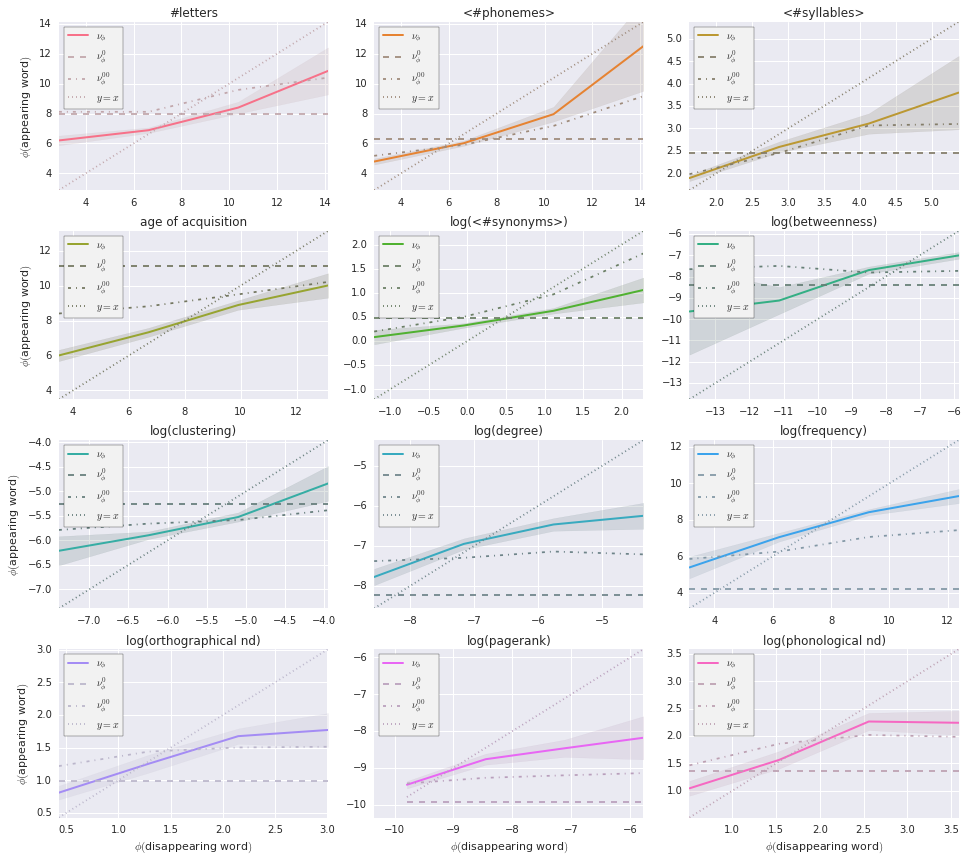

In [7]:
ordered_features = sorted(Substitution.__features__,
                          key=lambda f: Substitution._transformed_feature(f).__doc__)
g = sb.FacetGrid(data=variations, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_variation, 'source', 'destination')
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$)$')
g.set_ylabels(r'$\phi($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_variations-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative features.

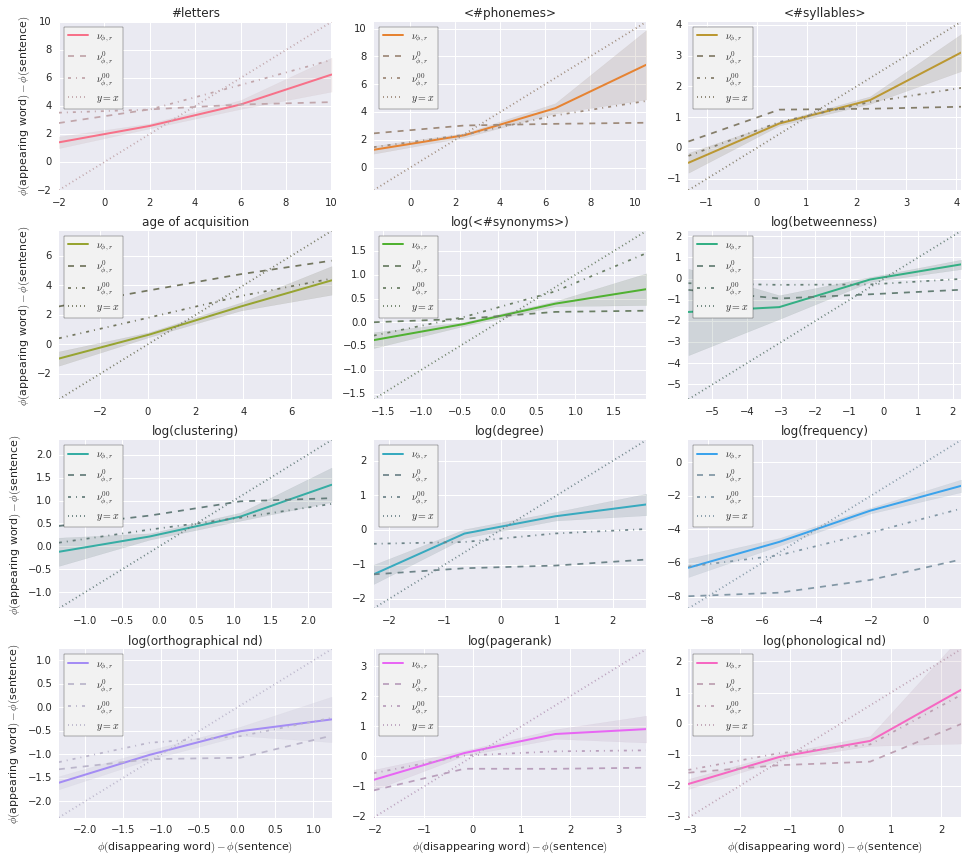

In [8]:
g = sb.FacetGrid(data=variations, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_variation, 'source', 'destination', relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$) - \phi($sentence$)$')
g.set_ylabels(r'$\phi($appearing word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_variations-relative'),
                  bbox_inches='tight', dpi=300)

Then plot $\nu_{\phi} - \nu_{\phi}^{00}$ for each feature (i.e. the measured bias) to see how they compare

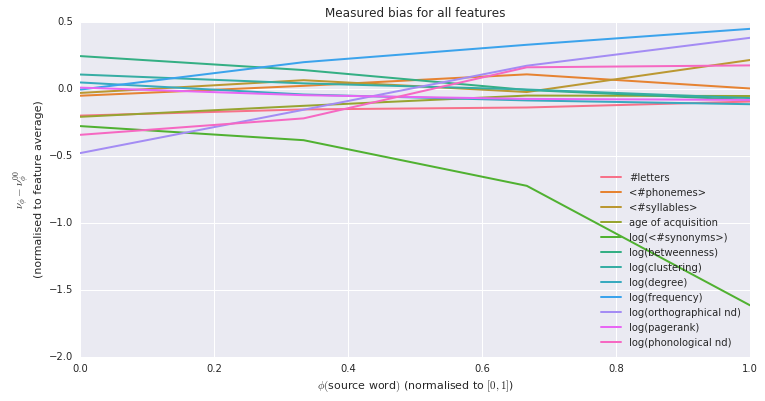

In [9]:
palette = sb.color_palette('husl', len(Substitution.__features__))
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(ordered_features):
    plot_bias(ax, variations[variations['feature'] == feature],
              color=palette[j], ci=False)
ax.legend(loc='lower right')
ax.set_title('Measured bias for all features')
ax.set_xlabel(r'$\phi($source word$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi} - \nu_{\phi}^{00}$' + '\n(normalised to feature average)')
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('all-feature_bias-absolute'),
                bbox_inches='tight', dpi=300)

Now with sentence-relative features.

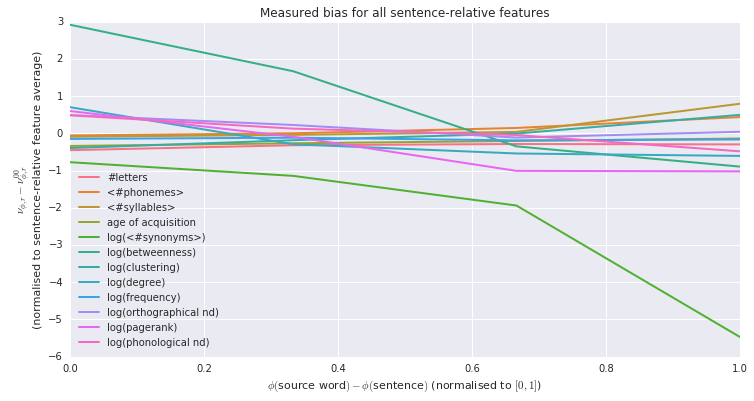

In [10]:
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(ordered_features):
    plot_bias(ax, variations[variations['feature'] == feature],
              color=palette[j], ci=False, relative=True)
ax.legend(loc='lower left')
ax.set_title('Measured bias for all sentence-relative features')
ax.set_xlabel(r'$\phi($source word$) - \phi($sentence$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$' +
              '\n(normalised to sentence-relative feature average)')
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('all-feature_bias-relative'),
                bbox_inches='tight', dpi=300)

### 2.3 Feature variations, reduced to features we expose in the paper

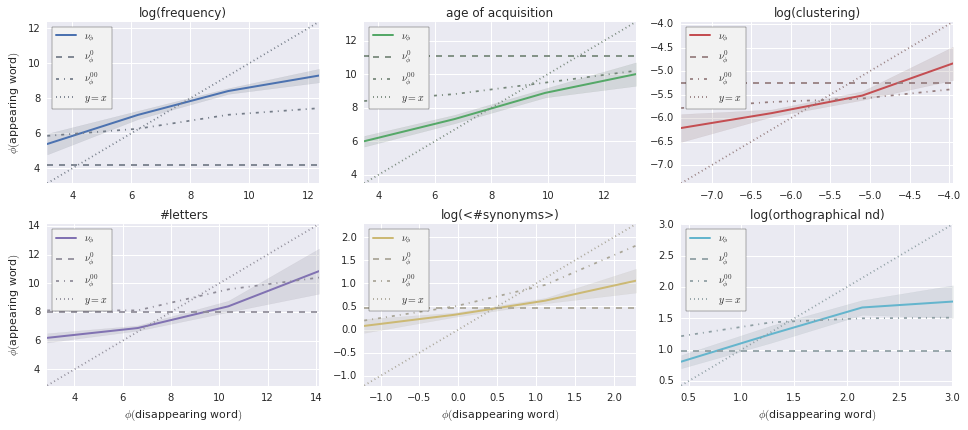

In [11]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_variation, 'source', 'destination')
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$)$')
g.set_ylabels(r'$\phi($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_variations-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative features.

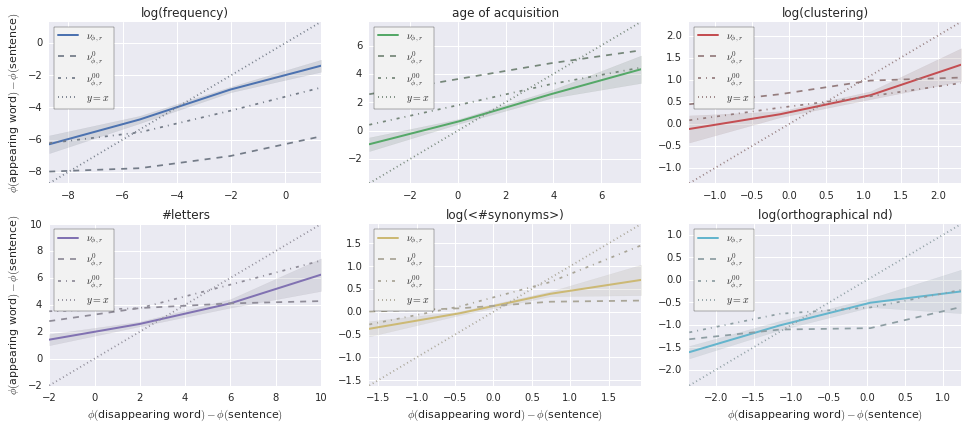

In [12]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_variation, 'source', 'destination', relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$) - \phi($sentence$)$')
g.set_ylabels(r'$\phi($appearing word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_variations-relative'),
                  bbox_inches='tight', dpi=300)

And the same with features relative to sentence average

Now $\nu_{\phi} - \nu_{\phi}^{00}$

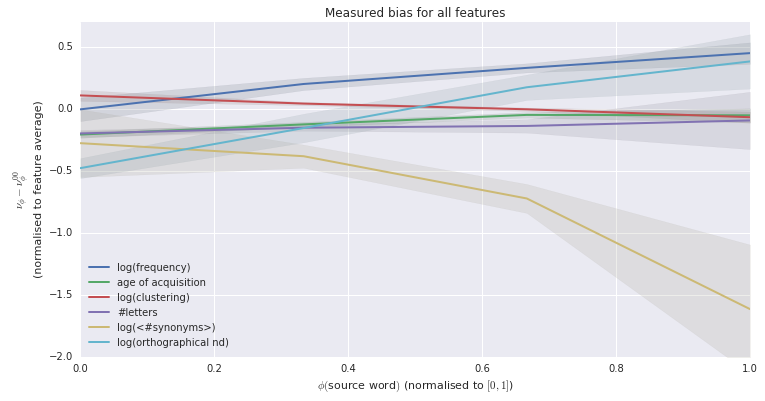

In [13]:
palette = sb.color_palette('deep', len(PAPER_FEATURES))
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(PAPER_FEATURES):
    plot_bias(ax, variations[variations['feature'] == feature],
              color=palette[j])
ax.legend(loc='lower left')
ax.set_title('Measured bias for all features')
ax.set_xlabel(r'$\phi($source word$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi} - \nu_{\phi}^{00}$' + '\n(normalised to feature average)')
ax.set_ylim(-2, .7)
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('paper-feature_bias-absolute'),
                bbox_inches='tight', dpi=300)

Now with sentence-relative features.

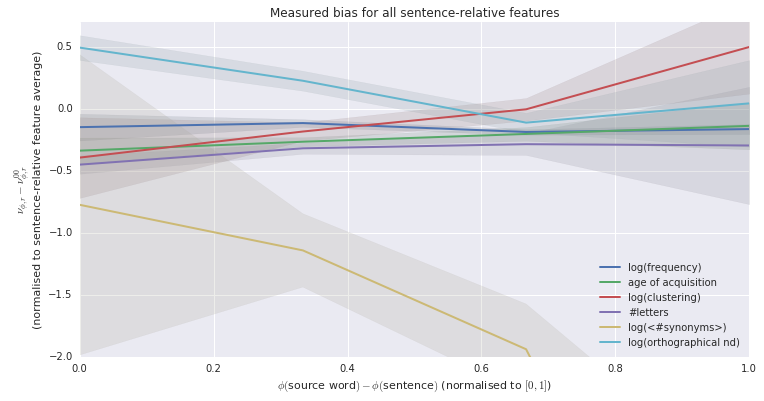

In [14]:
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(PAPER_FEATURES):
    plot_bias(ax, variations[variations['feature'] == feature],
              color=palette[j], relative=True)
ax.legend(loc='lower right')
ax.set_title('Measured bias for all sentence-relative features')
ax.set_xlabel(r'$\phi($source word$) - \phi($sentence$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$' +
              '\n(normalised to sentence-relative feature average)')
ax.set_ylim(-2, .7)
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('paper-feature_bias-relative'),
                bbox_inches='tight', dpi=300)

## 3 Streamplots

We'd like to see what happens between absolute and relative feature values, i.e. how do their effects interact. Especially, we want to know who wins between cognitive bias, attraction to sentence average, or attraction to global feature average.

To do this we plot the general direction (arrows) and strength (color) of where destination words are given a particular absolute/relative source feature couple. I.e., for a given absolute feature value and relative feature value, if this word were to be substituted, where would it go in this (absolute, relative) space?

The interesting thing in these plots is the attraction front, where all arrows point to and join. We're interested in:
* its slope
* its shape (e.g. several slope regimes?)
* its position w.r.t. $\nu_{\phi}^0$ and $y = 0$ (which is $\left< \phi(sentence) \right>$)

First, here's our plotting function. (Note we set the arrow size to something that turns out to be huge here, but gives normal sizes in the figures saves. There must be some dpi scaling problem with the arrows.)

In [15]:
def plot_stream(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    source = data['source']
    source_rel = data['source_rel']
    dest = data['destination']
    dest_rel = data['destination_rel']
    h0 = data['h0']
    
    # Compute binning.
    bin_count = 4
    x_bins, x_margins = pd.cut(source, bin_count, right=False, labels=False, retbins=True)
    x_middles = (x_margins[:-1] + x_margins[1:]) / 2
    y_bins, y_margins = pd.cut(source_rel, bin_count, right=False, labels=False, retbins=True)
    y_middles = (y_margins[:-1] + y_margins[1:]) / 2
    
    # Compute bin values.
    h0s = np.ones(bin_count) * h0.iloc[0]
    u_values = np.zeros((bin_count, bin_count))
    v_values = np.zeros((bin_count, bin_count))
    strength = np.zeros((bin_count, bin_count))
    for x in range(bin_count):
        for y in range(bin_count):
            u_values[y, x] = (dest[(x_bins == x) & (y_bins == y)] -
                              source[(x_bins == x) & (y_bins == y)]).mean()
            v_values[y, x] = (dest_rel[(x_bins == x) & (y_bins == y)] -
                              source_rel[(x_bins == x) & (y_bins == y)]).mean()
            strength[y, x] = np.sqrt((dest[(x_bins == x) & (y_bins == y)] - 
                                      source[(x_bins == x) & (y_bins == y)]) ** 2 +
                                     (dest_rel[(x_bins == x) & (y_bins == y)] - 
                                      source_rel[(x_bins == x) & (y_bins == y)]) ** 2).mean()
    
    # Plot.
    plt.streamplot(x_middles, y_middles, u_values, v_values,
                   arrowsize=4, color=strength, cmap=plt.cm.viridis)
    plt.plot(x_middles, np.zeros(bin_count), linestyle='-',
             color=sb.desaturate(color, 0.2), label=r'$\left< \phi(sentence) \right>$')
    plt.plot(h0s, y_middles, linestyle='--',
             color=sb.desaturate(color, 0.2), label=r'$\nu_{\phi}^0$')
    plt.xlim(x_middles[0], x_middles[-1])
    plt.ylim(y_middles[0], y_middles[-1])

Here are the plots for all features

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4089: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


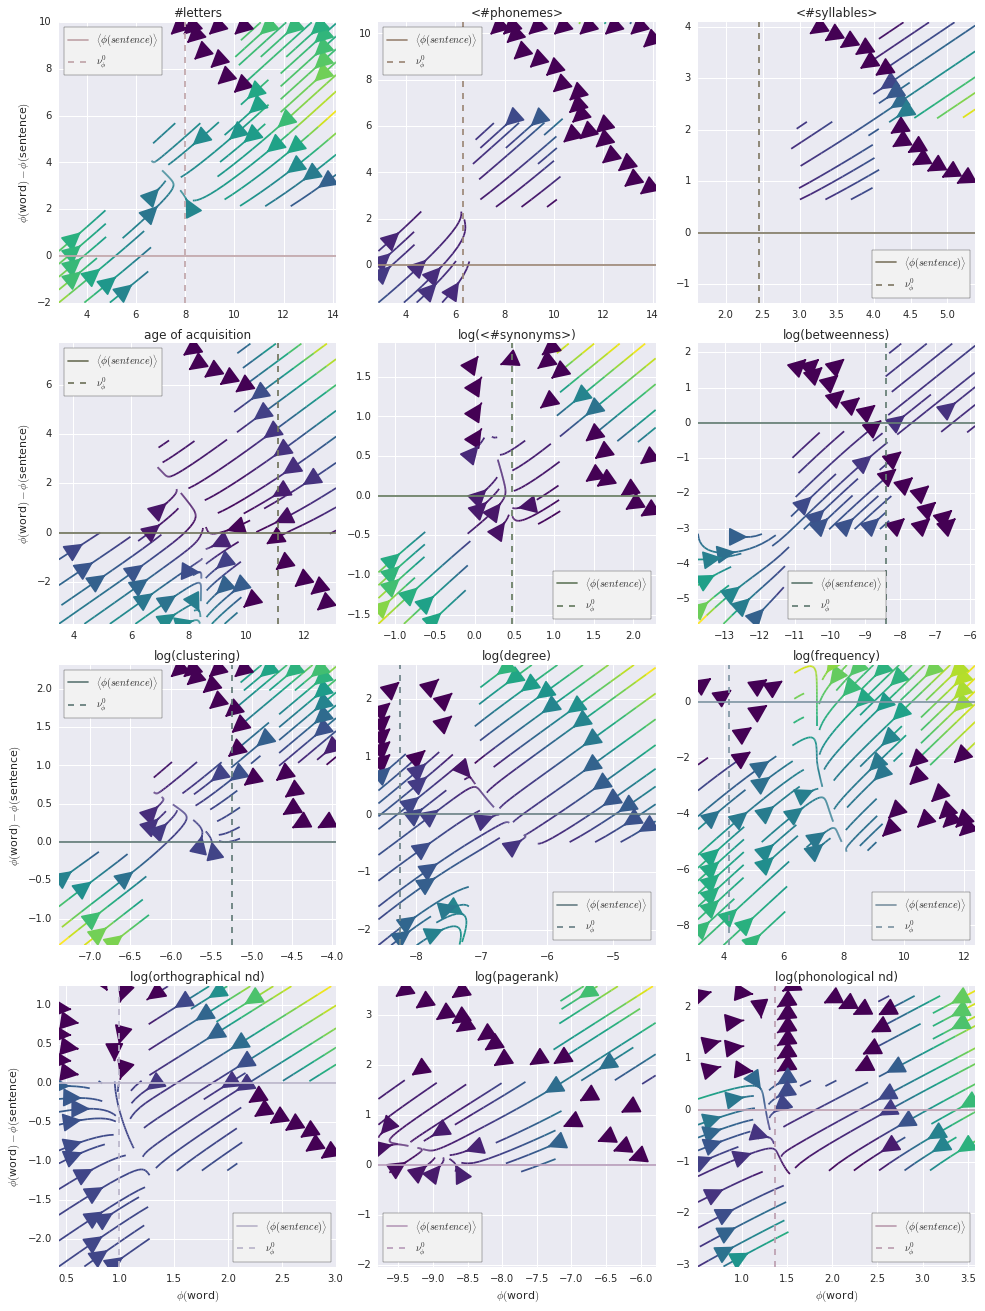

In [16]:
g = sb.FacetGrid(data=variations,
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_streams'),
                  bbox_inches='tight', dpi=300)

And here are the plots for the features we expose in the paper

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4089: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


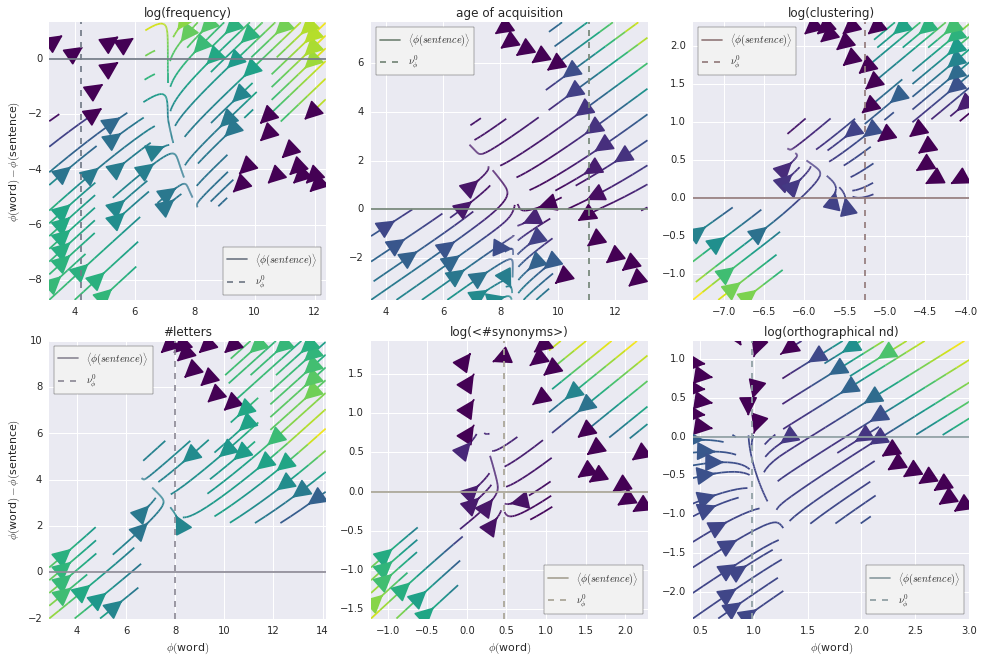

In [17]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_streams'),
                  bbox_inches='tight', dpi=300)

## 4 PCA'd feature variations

Compute PCA on feature *variations* (note: on variations, not on features directly), and show the evolution of the first three components upon substitution.

**CAVEAT**: the PCA is computed on variations where all features are defined. This greatly reduces the number of words included (and also the number of substitutions -- see below for real values, but you should know it's drastic). This also has an effect on the computation of $\mathcal{H}_0$ and $\mathcal{H}_{00}$, which are computed using words for which all features are defined. This, again, hugely reduces the number of words taken into account.

### 4.1 On all the features

Compute the actual PCA

In [18]:
# Compute the PCA.
pcafeatures = tuple(sorted(Substitution.__features__))
pcavariations = variations.pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:".format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 10 components.

Those explain the following variance:
[ 0.50944471  0.19347168  0.08014321  0.07702992  0.03180175  0.02919043
  0.02300569  0.01887973  0.01383057  0.01077125]

We're plotting variation for the first 3 components:


,aoa,betweenness,clustering,degree,frequency,letters_count,orthographical_density,pagerank,phonemes_count,phonological_density,syllables_count,synonyms_count
Component-0,-0.535581,0.250771,-0.080544,0.232838,0.205082,-0.427172,0.187705,0.255946,-0.401847,0.271965,-0.169730,0.005970
Component-1,0.348801,-0.402161,0.134383,-0.294084,-0.210908,-0.458319,0.167273,-0.279581,-0.434811,0.206765,-0.138545,0.019218
Component-2,-0.142343,0.229207,0.006172,0.118005,-0.947297,0.038731,-0.024253,0.103441,-0.038166,0.032258,-0.024028,0.002256


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [19]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution.components(component, pca, pcafeatures)
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'component': component,
                         'source': source,
                         'destination': destination,
                         'h0': substitution.component_average(component, pca, pcafeatures),
                         'h0n': substitution.component_average(component, pca, pcafeatures,
                                                               source_synonyms=True)})

original_component_variations = pd.DataFrame(data)
del data

  0% (    1 of 37155) |          | Elapsed Time: 0:00:46 ETA:  19 days, 22:23:04

  0% (   97 of 37155) |                    | Elapsed Time: 0:00:47 ETA:  0:05:40

  0% (  196 of 37155) |                    | Elapsed Time: 0:00:48 ETA:  0:05:33

  0% (  290 of 37155) |                    | Elapsed Time: 0:00:49 ETA:  0:05:37

  1% (  381 of 37155) |                    | Elapsed Time: 0:00:50 ETA:  0:05:42

  1% (  465 of 37155) |                    | Elapsed Time: 0:00:51 ETA:  0:05:44

  1% (  563 of 37155) |                    | Elapsed Time: 0:00:52 ETA:  0:05:40

  1% (  657 of 37155) |                    | Elapsed Time: 0:00:53 ETA:  0:05:40

  2% (  760 of 37155) |                    | Elapsed Time: 0:00:54 ETA:  0:05:35

  2% (  869 of 37155) |                    | Elapsed Time: 0:00:55 ETA:  0:05:28

  2% (  929 of 37155) |                    | Elapsed Time: 0:00:55 ETA:  0:05:24

  2% ( 1030 of 37155) |                    | Elapsed Time: 0:00:56 ETA:  0:05:22

  3% ( 1153 of 37155) |                    | Elapsed Time: 0:00:57 ETA:  0:05:09

  3% ( 1276 of 37155) |                    | Elapsed Time: 0:00:58 ETA:  0:04:54

  3% ( 1394 of 37155) |                    | Elapsed Time: 0:00:59 ETA:  0:04:38

  3% ( 1466 of 37155) |                    | Elapsed Time: 0:01:00 ETA:  0:04:47

  4% ( 1524 of 37155) |                    | Elapsed Time: 0:01:01 ETA:  0:05:00

  4% ( 1583 of 37155) |                    | Elapsed Time: 0:01:02 ETA:  0:05:19

  4% ( 1642 of 37155) |                    | Elapsed Time: 0:01:03 ETA:  0:05:43

  4% ( 1707 of 37155) |                    | Elapsed Time: 0:01:04 ETA:  0:06:00

  4% ( 1765 of 37155) |                    | Elapsed Time: 0:01:05 ETA:  0:06:24

  5% ( 1858 of 37155) |#                   | Elapsed Time: 0:01:06 ETA:  0:07:19

  5% ( 1964 of 37155) |#                   | Elapsed Time: 0:01:07 ETA:  0:07:38

  5% ( 2066 of 37155) |#                   | Elapsed Time: 0:01:08 ETA:  0:07:11

  5% ( 2179 of 37155) |#                   | Elapsed Time: 0:01:09 ETA:  0:06:27

  6% ( 2323 of 37155) |#                   | Elapsed Time: 0:01:10 ETA:  0:05:18

  6% ( 2456 of 37155) |#                   | Elapsed Time: 0:01:11 ETA:  0:04:42

  6% ( 2580 of 37155) |#                   | Elapsed Time: 0:01:12 ETA:  0:04:12

  7% ( 2724 of 37155) |#                   | Elapsed Time: 0:01:13 ETA:  0:03:51

  7% ( 2787 of 37155) |#                   | Elapsed Time: 0:01:14 ETA:  0:03:47

  7% ( 2930 of 37155) |#                   | Elapsed Time: 0:01:15 ETA:  0:03:34

  8% ( 3046 of 37155) |#                   | Elapsed Time: 0:01:16 ETA:  0:03:29

  8% ( 3167 of 37155) |#                   | Elapsed Time: 0:01:17 ETA:  0:03:26

  8% ( 3252 of 37155) |#                   | Elapsed Time: 0:01:18 ETA:  0:03:28

  9% ( 3367 of 37155) |#                   | Elapsed Time: 0:01:19 ETA:  0:03:32

  9% ( 3469 of 37155) |#                   | Elapsed Time: 0:01:20 ETA:  0:03:40

  9% ( 3590 of 37155) |#                   | Elapsed Time: 0:01:21 ETA:  0:03:40

  9% ( 3672 of 37155) |#                   | Elapsed Time: 0:01:22 ETA:  0:03:58

 10% ( 3716 of 37155) |##                  | Elapsed Time: 0:01:22 ETA:  0:04:04

 10% ( 3858 of 37155) |##                  | Elapsed Time: 0:01:23 ETA:  0:04:04

 10% ( 3944 of 37155) |##                  | Elapsed Time: 0:01:24 ETA:  0:04:14

 10% ( 4030 of 37155) |##                  | Elapsed Time: 0:01:25 ETA:  0:04:27

 11% ( 4154 of 37155) |##                  | Elapsed Time: 0:01:26 ETA:  0:04:23

 11% ( 4180 of 37155) |##                  | Elapsed Time: 0:01:26 ETA:  0:04:24

 11% ( 4301 of 37155) |##                  | Elapsed Time: 0:01:27 ETA:  0:04:15

 11% ( 4386 of 37155) |##                  | Elapsed Time: 0:01:28 ETA:  0:04:29

 12% ( 4474 of 37155) |##                  | Elapsed Time: 0:01:29 ETA:  0:04:26

 12% ( 4568 of 37155) |##                  | Elapsed Time: 0:01:30 ETA:  0:04:29

 12% ( 4645 of 37155) |##                  | Elapsed Time: 0:01:31 ETA:  0:04:51

 12% ( 4737 of 37155) |##                  | Elapsed Time: 0:01:32 ETA:  0:04:47

 13% ( 4831 of 37155) |##                  | Elapsed Time: 0:01:33 ETA:  0:04:42

 13% ( 4925 of 37155) |##                  | Elapsed Time: 0:01:34 ETA:  0:04:56

 13% ( 5019 of 37155) |##                  | Elapsed Time: 0:01:35 ETA:  0:04:58

 13% ( 5109 of 37155) |##                  | Elapsed Time: 0:01:36 ETA:  0:05:11

 13% ( 5200 of 37155) |##                  | Elapsed Time: 0:01:37 ETA:  0:05:07

 14% ( 5294 of 37155) |##                  | Elapsed Time: 0:01:38 ETA:  0:05:03

 14% ( 5376 of 37155) |##                  | Elapsed Time: 0:01:39 ETA:  0:05:08

 14% ( 5457 of 37155) |##                  | Elapsed Time: 0:01:40 ETA:  0:05:12

 14% ( 5549 of 37155) |##                  | Elapsed Time: 0:01:41 ETA:  0:05:10

 15% ( 5574 of 37155) |###                 | Elapsed Time: 0:01:41 ETA:  0:05:12

 15% ( 5666 of 37155) |###                 | Elapsed Time: 0:01:42 ETA:  0:05:12

 15% ( 5758 of 37155) |###                 | Elapsed Time: 0:01:43 ETA:  0:05:12

 15% ( 5849 of 37155) |###                 | Elapsed Time: 0:01:44 ETA:  0:05:12

 15% ( 5940 of 37155) |###                 | Elapsed Time: 0:01:45 ETA:  0:05:11

 16% ( 6038 of 37155) |###                 | Elapsed Time: 0:01:47 ETA:  0:05:07

 16% ( 6130 of 37155) |###                 | Elapsed Time: 0:01:48 ETA:  0:04:59

 16% ( 6238 of 37155) |###                 | Elapsed Time: 0:01:49 ETA:  0:04:49

 17% ( 6351 of 37155) |###                 | Elapsed Time: 0:01:50 ETA:  0:04:37

 17% ( 6466 of 37155) |###                 | Elapsed Time: 0:01:51 ETA:  0:04:25

 17% ( 6503 of 37155) |###                 | Elapsed Time: 0:01:51 ETA:  0:04:22

 17% ( 6601 of 37155) |###                 | Elapsed Time: 0:01:52 ETA:  0:04:18

 18% ( 6698 of 37155) |###                 | Elapsed Time: 0:01:53 ETA:  0:04:14

 18% ( 6798 of 37155) |###                 | Elapsed Time: 0:01:54 ETA:  0:04:09

 18% ( 6888 of 37155) |###                 | Elapsed Time: 0:01:55 ETA:  0:04:13

 18% ( 6967 of 37155) |###                 | Elapsed Time: 0:01:56 ETA:  0:04:17

 19% ( 7065 of 37155) |###                 | Elapsed Time: 0:01:57 ETA:  0:04:20

 19% ( 7170 of 37155) |###                 | Elapsed Time: 0:01:58 ETA:  0:04:23

 19% ( 7269 of 37155) |###                 | Elapsed Time: 0:01:59 ETA:  0:04:30

 19% ( 7359 of 37155) |###                 | Elapsed Time: 0:02:00 ETA:  0:04:31

 20% ( 7431 of 37155) |####                | Elapsed Time: 0:02:01 ETA:  0:04:29

 20% ( 7533 of 37155) |####                | Elapsed Time: 0:02:02 ETA:  0:04:25

 20% ( 7639 of 37155) |####                | Elapsed Time: 0:02:03 ETA:  0:04:22

 20% ( 7745 of 37155) |####                | Elapsed Time: 0:02:04 ETA:  0:04:13

 21% ( 7851 of 37155) |####                | Elapsed Time: 0:02:05 ETA:  0:04:02

 21% ( 7896 of 37155) |####                | Elapsed Time: 0:02:05 ETA:  0:03:57

 21% ( 8005 of 37155) |####                | Elapsed Time: 0:02:06 ETA:  0:03:54

 21% ( 8109 of 37155) |####                | Elapsed Time: 0:02:07 ETA:  0:03:51

 22% ( 8225 of 37155) |####                | Elapsed Time: 0:02:08 ETA:  0:03:39

 22% ( 8334 of 37155) |####                | Elapsed Time: 0:02:09 ETA:  0:03:36

 22% ( 8360 of 37155) |####                | Elapsed Time: 0:02:09 ETA:  0:03:34

 22% ( 8464 of 37155) |####                | Elapsed Time: 0:02:10 ETA:  0:03:33

 23% ( 8554 of 37155) |####                | Elapsed Time: 0:02:11 ETA:  0:03:39

 23% ( 8637 of 37155) |####                | Elapsed Time: 0:02:12 ETA:  0:03:48

 23% ( 8743 of 37155) |####                | Elapsed Time: 0:02:13 ETA:  0:03:49

 23% ( 8825 of 37155) |####                | Elapsed Time: 0:02:14 ETA:  0:03:49

 23% ( 8903 of 37155) |####                | Elapsed Time: 0:02:15 ETA:  0:04:00

 24% ( 9037 of 37155) |####                | Elapsed Time: 0:02:16 ETA:  0:03:51

 24% ( 9162 of 37155) |####                | Elapsed Time: 0:02:17 ETA:  0:03:43

 25% ( 9289 of 37155) |#####               | Elapsed Time: 0:02:18 ETA:  0:03:34

 25% ( 9425 of 37155) |#####               | Elapsed Time: 0:02:19 ETA:  0:03:14

 25% ( 9547 of 37155) |#####               | Elapsed Time: 0:02:20 ETA:  0:02:59

 25% ( 9631 of 37155) |#####               | Elapsed Time: 0:02:21 ETA:  0:03:05

 26% ( 9710 of 37155) |#####               | Elapsed Time: 0:02:22 ETA:  0:03:15

 26% ( 9754 of 37155) |#####               | Elapsed Time: 0:02:23 ETA:  0:03:09

 26% ( 9824 of 37155) |#####               | Elapsed Time: 0:02:24 ETA:  0:03:35

 26% ( 9934 of 37155) |#####               | Elapsed Time: 0:02:25 ETA:  0:03:41

 27% (10057 of 37155) |#####               | Elapsed Time: 0:02:26 ETA:  0:03:40

 27% (10063 of 37155) |#####               | Elapsed Time: 0:02:31 ETA:  0:07:27

 27% (10180 of 37155) |#####               | Elapsed Time: 0:02:32 ETA:  0:07:41

 27% (10218 of 37155) |#####               | Elapsed Time: 0:02:32 ETA:  0:08:20

 27% (10334 of 37155) |#####               | Elapsed Time: 0:02:33 ETA:  0:07:49

 28% (10443 of 37155) |#####               | Elapsed Time: 0:02:34 ETA:  0:07:23

 28% (10537 of 37155) |#####               | Elapsed Time: 0:02:35 ETA:  0:07:04

 28% (10632 of 37155) |#####               | Elapsed Time: 0:02:36 ETA:  0:06:45

 28% (10683 of 37155) |#####               | Elapsed Time: 0:02:36 ETA:  0:06:59

 29% (10814 of 37155) |#####               | Elapsed Time: 0:02:37 ETA:  0:06:52

 29% (10931 of 37155) |#####               | Elapsed Time: 0:02:38 ETA:  0:02:53

 29% (11027 of 37155) |#####               | Elapsed Time: 0:02:39 ETA:  0:03:00

 30% (11147 of 37155) |######              | Elapsed Time: 0:02:40 ETA:  0:02:50

 30% (11264 of 37155) |######              | Elapsed Time: 0:02:41 ETA:  0:02:49

 30% (11377 of 37155) |######              | Elapsed Time: 0:02:42 ETA:  0:02:47

 30% (11515 of 37155) |######              | Elapsed Time: 0:02:43 ETA:  0:02:31

 31% (11611 of 37155) |######              | Elapsed Time: 0:02:44 ETA:  0:02:18

 31% (11750 of 37155) |######              | Elapsed Time: 0:02:45 ETA:  0:02:13

 32% (11890 of 37155) |######              | Elapsed Time: 0:02:46 ETA:  0:02:10

 32% (12027 of 37155) |######              | Elapsed Time: 0:02:47 ETA:  0:02:03

 32% (12076 of 37155) |######              | Elapsed Time: 0:02:47 ETA:  0:01:52

 32% (12180 of 37155) |######              | Elapsed Time: 0:02:48 ETA:  0:02:01

 33% (12288 of 37155) |######              | Elapsed Time: 0:02:49 ETA:  0:02:02

 33% (12397 of 37155) |######              | Elapsed Time: 0:02:50 ETA:  0:02:03

 33% (12540 of 37155) |######              | Elapsed Time: 0:02:52 ETA:  0:02:08

 34% (12672 of 37155) |######              | Elapsed Time: 0:02:53 ETA:  0:02:09

 34% (12815 of 37155) |######              | Elapsed Time: 0:02:54 ETA:  0:02:07

 34% (12956 of 37155) |######              | Elapsed Time: 0:02:55 ETA:  0:02:05

 35% (13005 of 37155) |#######             | Elapsed Time: 0:02:55 ETA:  0:02:07

 35% (13113 of 37155) |#######             | Elapsed Time: 0:02:56 ETA:  0:02:04

 35% (13185 of 37155) |#######             | Elapsed Time: 0:02:57 ETA:  0:02:15

 35% (13285 of 37155) |#######             | Elapsed Time: 0:02:58 ETA:  0:02:17

 35% (13372 of 37155) |#######             | Elapsed Time: 0:02:59 ETA:  0:02:30

 36% (13469 of 37155) |#######             | Elapsed Time: 0:03:00 ETA:  0:02:46

 36% (13576 of 37155) |#######             | Elapsed Time: 0:03:01 ETA:  0:03:01

 36% (13705 of 37155) |#######             | Elapsed Time: 0:03:02 ETA:  0:03:06

 37% (13805 of 37155) |#######             | Elapsed Time: 0:03:03 ETA:  0:03:11

 37% (13893 of 37155) |#######             | Elapsed Time: 0:03:04 ETA:  0:03:19

 37% (13934 of 37155) |#######             | Elapsed Time: 0:03:04 ETA:  0:03:01

 37% (14067 of 37155) |#######             | Elapsed Time: 0:03:05 ETA:  0:02:44

 38% (14190 of 37155) |#######             | Elapsed Time: 0:03:06 ETA:  0:02:28

 38% (14262 of 37155) |#######             | Elapsed Time: 0:03:07 ETA:  0:02:36

 38% (14335 of 37155) |#######             | Elapsed Time: 0:03:08 ETA:  0:02:49

 38% (14398 of 37155) |#######             | Elapsed Time: 0:03:09 ETA:  0:02:45

 39% (14503 of 37155) |#######             | Elapsed Time: 0:03:10 ETA:  0:02:55

 39% (14599 of 37155) |#######             | Elapsed Time: 0:03:11 ETA:  0:02:56

 39% (14704 of 37155) |#######             | Elapsed Time: 0:03:12 ETA:  0:02:47

 39% (14802 of 37155) |#######             | Elapsed Time: 0:03:13 ETA:  0:02:52

 40% (14862 of 37155) |########            | Elapsed Time: 0:03:13 ETA:  0:03:07

 40% (14979 of 37155) |########            | Elapsed Time: 0:03:14 ETA:  0:03:09

 40% (15101 of 37155) |########            | Elapsed Time: 0:03:15 ETA:  0:02:44

 40% (15197 of 37155) |########            | Elapsed Time: 0:03:16 ETA:  0:02:34

 41% (15295 of 37155) |########            | Elapsed Time: 0:03:17 ETA:  0:02:40

 41% (15327 of 37155) |########            | Elapsed Time: 0:03:18 ETA:  0:02:41

 41% (15427 of 37155) |########            | Elapsed Time: 0:03:19 ETA:  0:02:38

 41% (15537 of 37155) |########            | Elapsed Time: 0:03:20 ETA:  0:02:35

 42% (15654 of 37155) |########            | Elapsed Time: 0:03:21 ETA:  0:02:26

 42% (15791 of 37155) |########            | Elapsed Time: 0:03:22 ETA:  0:02:18

 42% (15924 of 37155) |########            | Elapsed Time: 0:03:23 ETA:  0:02:12

 43% (16029 of 37155) |########            | Elapsed Time: 0:03:24 ETA:  0:02:07

 43% (16122 of 37155) |########            | Elapsed Time: 0:03:25 ETA:  0:02:08

 43% (16228 of 37155) |########            | Elapsed Time: 0:03:26 ETA:  0:02:08

 43% (16256 of 37155) |########            | Elapsed Time: 0:03:26 ETA:  0:02:04

 44% (16391 of 37155) |########            | Elapsed Time: 0:03:27 ETA:  0:01:53

 44% (16518 of 37155) |########            | Elapsed Time: 0:03:28 ETA:  0:01:48

 44% (16629 of 37155) |########            | Elapsed Time: 0:03:29 ETA:  0:01:53

 45% (16720 of 37155) |#########           | Elapsed Time: 0:03:30 ETA:  0:01:54

 45% (16840 of 37155) |#########           | Elapsed Time: 0:03:31 ETA:  0:01:58

 45% (16958 of 37155) |#########           | Elapsed Time: 0:03:32 ETA:  0:01:52

 45% (17064 of 37155) |#########           | Elapsed Time: 0:03:33 ETA:  0:01:47

 46% (17185 of 37155) |#########           | Elapsed Time: 0:03:34 ETA:  0:01:41

 46% (17309 of 37155) |#########           | Elapsed Time: 0:03:35 ETA:  0:01:43

 46% (17431 of 37155) |#########           | Elapsed Time: 0:03:36 ETA:  0:01:44

 47% (17554 of 37155) |#########           | Elapsed Time: 0:03:37 ETA:  0:01:39

 47% (17649 of 37155) |#########           | Elapsed Time: 0:03:38 ETA:  0:01:34

 47% (17743 of 37155) |#########           | Elapsed Time: 0:03:39 ETA:  0:01:42

 48% (17838 of 37155) |#########           | Elapsed Time: 0:03:40 ETA:  0:01:49

 48% (17970 of 37155) |#########           | Elapsed Time: 0:03:41 ETA:  0:01:39

 48% (18077 of 37155) |#########           | Elapsed Time: 0:03:42 ETA:  0:01:41

 48% (18114 of 37155) |#########           | Elapsed Time: 0:03:42 ETA:  0:01:42

 49% (18223 of 37155) |#########           | Elapsed Time: 0:03:43 ETA:  0:01:46

 49% (18323 of 37155) |#########           | Elapsed Time: 0:03:44 ETA:  0:01:53

 49% (18444 of 37155) |#########           | Elapsed Time: 0:03:45 ETA:  0:01:53

 49% (18538 of 37155) |#########           | Elapsed Time: 0:03:46 ETA:  0:02:03

 50% (18578 of 37155) |##########          | Elapsed Time: 0:03:47 ETA:  0:01:58

 50% (18691 of 37155) |##########          | Elapsed Time: 0:03:48 ETA:  0:01:50

 50% (18798 of 37155) |##########          | Elapsed Time: 0:03:49 ETA:  0:01:59

 50% (18917 of 37155) |##########          | Elapsed Time: 0:03:50 ETA:  0:01:53

 51% (19042 of 37155) |##########          | Elapsed Time: 0:03:51 ETA:  0:01:53

 51% (19139 of 37155) |##########          | Elapsed Time: 0:03:52 ETA:  0:01:54

 51% (19247 of 37155) |##########          | Elapsed Time: 0:03:53 ETA:  0:01:58

 52% (19363 of 37155) |##########          | Elapsed Time: 0:03:54 ETA:  0:01:47

 52% (19507 of 37155) |##########          | Elapsed Time: 0:03:55 ETA:  0:01:37

 52% (19626 of 37155) |##########          | Elapsed Time: 0:03:56 ETA:  0:01:32

 53% (19747 of 37155) |##########          | Elapsed Time: 0:03:57 ETA:  0:01:30

 53% (19855 of 37155) |##########          | Elapsed Time: 0:03:58 ETA:  0:01:31

 53% (19971 of 37155) |##########          | Elapsed Time: 0:03:59 ETA:  0:01:23

 54% (20079 of 37155) |##########          | Elapsed Time: 0:04:00 ETA:  0:01:22

 54% (20201 of 37155) |##########          | Elapsed Time: 0:04:01 ETA:  0:01:19

 54% (20334 of 37155) |##########          | Elapsed Time: 0:04:02 ETA:  0:01:16

 55% (20436 of 37155) |###########         | Elapsed Time: 0:04:03 ETA:  0:01:13

 55% (20550 of 37155) |###########         | Elapsed Time: 0:04:04 ETA:  0:01:13

 55% (20651 of 37155) |###########         | Elapsed Time: 0:04:05 ETA:  0:01:19

 55% (20721 of 37155) |###########         | Elapsed Time: 0:04:06 ETA:  0:01:33

 56% (20838 of 37155) |###########         | Elapsed Time: 0:04:07 ETA:  0:01:28

 56% (20900 of 37155) |###########         | Elapsed Time: 0:04:07 ETA:  0:01:26

 56% (21016 of 37155) |###########         | Elapsed Time: 0:04:08 ETA:  0:01:23

 56% (21139 of 37155) |###########         | Elapsed Time: 0:04:09 ETA:  0:01:21

 57% (21267 of 37155) |###########         | Elapsed Time: 0:04:10 ETA:  0:01:22

 57% (21365 of 37155) |###########         | Elapsed Time: 0:04:11 ETA:  0:01:25

 57% (21479 of 37155) |###########         | Elapsed Time: 0:04:12 ETA:  0:01:25

 57% (21539 of 37155) |###########         | Elapsed Time: 0:04:13 ETA:  0:01:39

 58% (21624 of 37155) |###########         | Elapsed Time: 0:04:14 ETA:  0:01:32

 58% (21727 of 37155) |###########         | Elapsed Time: 0:04:15 ETA:  0:01:37

 58% (21829 of 37155) |###########         | Elapsed Time: 0:04:16 ETA:  0:01:35

 59% (21945 of 37155) |###########         | Elapsed Time: 0:04:17 ETA:  0:01:34

 59% (22068 of 37155) |###########         | Elapsed Time: 0:04:18 ETA:  0:01:33

 59% (22181 of 37155) |###########         | Elapsed Time: 0:04:19 ETA:  0:01:39

 60% (22293 of 37155) |############        | Elapsed Time: 0:04:20 ETA:  0:01:44

 60% (22426 of 37155) |############        | Elapsed Time: 0:04:21 ETA:  0:01:13

 60% (22534 of 37155) |############        | Elapsed Time: 0:04:22 ETA:  0:01:04

 60% (22657 of 37155) |############        | Elapsed Time: 0:04:23 ETA:  0:00:56

 61% (22758 of 37155) |############        | Elapsed Time: 0:04:24 ETA:  0:00:53

 61% (22874 of 37155) |############        | Elapsed Time: 0:04:25 ETA:  0:00:52

 61% (22989 of 37155) |############        | Elapsed Time: 0:04:26 ETA:  0:00:54

 62% (23127 of 37155) |############        | Elapsed Time: 0:04:27 ETA:  0:00:44

 62% (23222 of 37155) |############        | Elapsed Time: 0:04:28 ETA:  0:00:42

 62% (23355 of 37155) |############        | Elapsed Time: 0:04:29 ETA:  0:00:37

 63% (23465 of 37155) |############        | Elapsed Time: 0:04:30 ETA:  0:00:43

 63% (23574 of 37155) |############        | Elapsed Time: 0:04:31 ETA:  0:00:41

 63% (23687 of 37155) |############        | Elapsed Time: 0:04:32 ETA:  0:00:46

 64% (23796 of 37155) |############        | Elapsed Time: 0:04:33 ETA:  0:00:47

 64% (23901 of 37155) |############        | Elapsed Time: 0:04:34 ETA:  0:00:50

 64% (23993 of 37155) |############        | Elapsed Time: 0:04:35 ETA:  0:01:06

 65% (24151 of 37155) |#############       | Elapsed Time: 0:04:36 ETA:  0:00:59

 65% (24253 of 37155) |#############       | Elapsed Time: 0:04:37 ETA:  0:01:01

 65% (24374 of 37155) |#############       | Elapsed Time: 0:04:38 ETA:  0:00:55

 65% (24498 of 37155) |#############       | Elapsed Time: 0:04:39 ETA:  0:00:46

 66% (24616 of 37155) |#############       | Elapsed Time: 0:04:40 ETA:  0:00:40

 66% (24743 of 37155) |#############       | Elapsed Time: 0:04:41 ETA:  0:00:32

 66% (24864 of 37155) |#############       | Elapsed Time: 0:04:42 ETA:  0:00:26

 67% (24972 of 37155) |#############       | Elapsed Time: 0:04:43 ETA:  0:00:20

 67% (25080 of 37155) |#############       | Elapsed Time: 0:04:44 ETA:  0:00:25

 67% (25207 of 37155) |#############       | Elapsed Time: 0:04:45 ETA:  0:00:22

 68% (25317 of 37155) |#############       | Elapsed Time: 0:04:46 ETA:  0:00:19

 68% (25414 of 37155) |#############       | Elapsed Time: 0:04:47 ETA:  0:00:25

 68% (25509 of 37155) |#############       | Elapsed Time: 0:04:48 ETA:  0:00:33

 68% (25545 of 37155) |#############       | Elapsed Time: 0:04:49 ETA:  0:00:43

 68% (25628 of 37155) |#############       | Elapsed Time: 0:04:50 ETA:  0:00:59

 69% (25730 of 37155) |#############       | Elapsed Time: 0:04:51 ETA:  0:01:05

 69% (25805 of 37155) |#############       | Elapsed Time: 0:04:52 ETA:  0:01:18

 69% (25935 of 37155) |#############       | Elapsed Time: 0:04:53 ETA:  0:01:15

 70% (26009 of 37155) |##############      | Elapsed Time: 0:04:53 ETA:  0:01:22

 70% (26107 of 37155) |##############      | Elapsed Time: 0:04:54 ETA:  0:01:27

 70% (26177 of 37155) |##############      | Elapsed Time: 0:04:55 ETA:  0:01:39

 70% (26293 of 37155) |##############      | Elapsed Time: 0:04:56 ETA:  0:01:27

 71% (26418 of 37155) |##############      | Elapsed Time: 0:04:57 ETA:  0:01:11

 71% (26473 of 37155) |##############      | Elapsed Time: 0:04:58 ETA:  0:00:58

 71% (26563 of 37155) |##############      | Elapsed Time: 0:04:59 ETA:  0:01:02

 71% (26660 of 37155) |##############      | Elapsed Time: 0:05:00 ETA:  0:00:51

 72% (26764 of 37155) |##############      | Elapsed Time: 0:05:01 ETA:  0:01:01

 72% (26875 of 37155) |##############      | Elapsed Time: 0:05:02 ETA:  0:01:01

 72% (26938 of 37155) |##############      | Elapsed Time: 0:05:02 ETA:  0:00:53

 72% (27080 of 37155) |##############      | Elapsed Time: 0:05:03 ETA:  0:00:24

 73% (27199 of 37155) |##############      | Elapsed Time: 0:05:04 ETA:  0:00:22

 73% (27305 of 37155) |##############      | Elapsed Time: 0:05:05 ETA:  0:00:28

 73% (27402 of 37155) |##############      | Elapsed Time: 0:05:06 ETA:  0:00:34

 74% (27503 of 37155) |##############      | Elapsed Time: 0:05:07 ETA:  0:00:29

 74% (27638 of 37155) |##############      | Elapsed Time: 0:05:08 ETA:  0:00:14

 74% (27754 of 37155) |##############      | Elapsed Time: 0:05:09 ETA:  0:00:10

 75% (27867 of 37155) |###############     | Elapsed Time: 0:05:10 ETA:  0:00:14

 75% (28005 of 37155) |###############     | Elapsed Time: 0:05:11 ETA:  0:00:14

 75% (28131 of 37155) |###############     | Elapsed Time: 0:05:12 ETA:  0:00:11

 75% (28223 of 37155) |###############     | Elapsed Time: 0:05:13 ETA:  0:00:15

 76% (28331 of 37155) |###############     | Elapsed Time: 0:05:14 ETA:  0:00:09

 76% (28441 of 37155) |###############     | Elapsed Time: 0:05:15 ETA:  0:00:18

 76% (28537 of 37155) |###############     | Elapsed Time: 0:05:16 ETA:  0:00:25

 77% (28655 of 37155) |###############     | Elapsed Time: 0:05:17 ETA:  0:00:15

 77% (28770 of 37155) |###############     | Elapsed Time: 0:05:18 ETA:  0:00:14

 77% (28796 of 37155) |###############     | Elapsed Time: 0:05:19 ETA:  0:00:26

 77% (28904 of 37155) |###############     | Elapsed Time: 0:05:20 ETA:  0:00:33

 78% (29036 of 37155) |###############     | Elapsed Time: 0:05:21 ETA:  0:00:14

 78% (29132 of 37155) |###############     | Elapsed Time: 0:05:22 ETA:  0:00:16

 78% (29260 of 37155) |###############     | Elapsed Time: 0:05:23 ETA:  0:00:08

 79% (29356 of 37155) |###############     | Elapsed Time: 0:05:24 ETA:  0:00:07

 79% (29467 of 37155) |###############     | Elapsed Time: 0:05:25 ETA:  0:00:09

 79% (29560 of 37155) |###############     | Elapsed Time: 0:05:26 ETA:  0:00:17

 79% (29671 of 37155) |###############     | Elapsed Time: 0:05:27 ETA:  0:00:15

 80% (29724 of 37155) |################    | Elapsed Time: 0:05:27 ETA:  0:00:10

 80% (29849 of 37155) |################    | Elapsed Time: 0:05:28 ETA:  0:00:12

 80% (29981 of 37155) |################    | Elapsed Time: 0:05:29 ETA:  0:00:00

 81% (30120 of 37155) |################    | Elapsed Time: 0:05:30 ETA:  0:00:00

 81% (30189 of 37155) |################    | Elapsed Time: 0:05:31 ETA:  0:00:02

 81% (30271 of 37155) |################    | Elapsed Time: 0:05:32 ETA:  0:00:06

 81% (30387 of 37155) |################    | Elapsed Time: 0:05:33 ETA:  0:00:04

 81% (30461 of 37155) |################    | Elapsed Time: 0:05:34 ETA:  0:00:10

 82% (30588 of 37155) |################    | Elapsed Time: 0:05:35 ETA:  0:00:03

 82% (30653 of 37155) |################    | Elapsed Time: 0:05:36 ETA:  0:00:02

 82% (30760 of 37155) |################    | Elapsed Time: 0:05:37 ETA:  0:00:08

 83% (30875 of 37155) |################    | Elapsed Time: 0:05:38 ETA:  0:00:14

 83% (30997 of 37155) |################    | Elapsed Time: 0:05:39 ETA:  0:00:20

 83% (31118 of 37155) |################    | Elapsed Time: 0:05:40 ETA:  0:00:02

 84% (31242 of 37155) |################    | Elapsed Time: 0:05:41 ETA:  0:00:00

 84% (31374 of 37155) |################    | Elapsed Time: 0:05:42 ETA:  0:00:00

 84% (31509 of 37155) |################    | Elapsed Time: 0:05:43 ETA:  0:00:00

 85% (31582 of 37155) |#################   | Elapsed Time: 0:05:43 ETA:  0:00:00

 85% (31695 of 37155) |#################   | Elapsed Time: 0:05:44 ETA:  0:00:00

 85% (31797 of 37155) |#################   | Elapsed Time: 0:05:45 ETA:  0:00:00

 85% (31911 of 37155) |#################   | Elapsed Time: 0:05:46 ETA:  0:00:00

 86% (32047 of 37155) |#################   | Elapsed Time: 0:05:48 ETA:  0:00:00

 86% (32160 of 37155) |#################   | Elapsed Time: 0:05:49 ETA:  0:00:00

 86% (32283 of 37155) |#################   | Elapsed Time: 0:05:50 ETA:  0:00:00

 87% (32405 of 37155) |#################   | Elapsed Time: 0:05:51 ETA:  0:00:00

 87% (32511 of 37155) |#################   | Elapsed Time: 0:05:51 ETA:  0:00:00

 87% (32648 of 37155) |#################   | Elapsed Time: 0:05:52 ETA:  0:00:00

 88% (32775 of 37155) |#################   | Elapsed Time: 0:05:53 ETA:  0:00:00

 88% (32874 of 37155) |#################   | Elapsed Time: 0:05:54 ETA:  0:00:00

 88% (32976 of 37155) |#################   | Elapsed Time: 0:05:55 ETA:  0:00:00

 89% (33070 of 37155) |#################   | Elapsed Time: 0:05:56 ETA:  0:00:00

 89% (33152 of 37155) |#################   | Elapsed Time: 0:05:57 ETA:  0:00:00

 89% (33254 of 37155) |#################   | Elapsed Time: 0:05:58 ETA:  0:00:00

 89% (33347 of 37155) |#################   | Elapsed Time: 0:05:59 ETA:  0:00:00

 90% (33440 of 37155) |##################  | Elapsed Time: 0:06:01 ETA:  0:00:35

 90% (33541 of 37155) |##################  | Elapsed Time: 0:06:02 ETA:  0:00:33

 90% (33659 of 37155) |##################  | Elapsed Time: 0:06:03 ETA:  0:00:22

 90% (33765 of 37155) |##################  | Elapsed Time: 0:06:04 ETA:  0:00:16

 91% (33885 of 37155) |##################  | Elapsed Time: 0:06:05 ETA:  0:00:03

 91% (33904 of 37155) |##################  | Elapsed Time: 0:06:05 ETA:  0:00:00

 91% (33984 of 37155) |##################  | Elapsed Time: 0:06:06 ETA:  0:00:04

 91% (34102 of 37155) |##################  | Elapsed Time: 0:06:07 ETA:  0:00:00

 92% (34214 of 37155) |##################  | Elapsed Time: 0:06:08 ETA:  0:00:00

 92% (34329 of 37155) |##################  | Elapsed Time: 0:06:09 ETA:  0:00:00

 92% (34369 of 37155) |##################  | Elapsed Time: 0:06:09 ETA:  0:00:00

 92% (34484 of 37155) |##################  | Elapsed Time: 0:06:10 ETA:  0:00:00

 93% (34605 of 37155) |##################  | Elapsed Time: 0:06:11 ETA:  0:00:00

 93% (34720 of 37155) |##################  | Elapsed Time: 0:06:12 ETA:  0:00:00

 93% (34799 of 37155) |##################  | Elapsed Time: 0:06:13 ETA:  0:00:00

 93% (34833 of 37155) |##################  | Elapsed Time: 0:06:14 ETA:  0:00:00

 94% (34946 of 37155) |##################  | Elapsed Time: 0:06:15 ETA:  0:00:00

 94% (35050 of 37155) |##################  | Elapsed Time: 0:06:16 ETA:  0:00:00

 94% (35150 of 37155) |##################  | Elapsed Time: 0:06:17 ETA:  0:00:00

 95% (35298 of 37155) |################### | Elapsed Time: 0:06:18 ETA:  0:00:00

 95% (35425 of 37155) |################### | Elapsed Time: 0:06:19 ETA:  0:00:00

 95% (35528 of 37155) |################### | Elapsed Time: 0:06:20 ETA:  0:00:00

 95% (35648 of 37155) |################### | Elapsed Time: 0:06:21 ETA:  0:00:00

 96% (35762 of 37155) |################### | Elapsed Time: 0:06:22 ETA:  0:00:00

 96% (35891 of 37155) |################### | Elapsed Time: 0:06:23 ETA:  0:00:00

 96% (36010 of 37155) |################### | Elapsed Time: 0:06:24 ETA:  0:00:00

 97% (36102 of 37155) |################### | Elapsed Time: 0:06:25 ETA:  0:00:00

 97% (36227 of 37155) |################### | Elapsed Time: 0:06:26 ETA:  0:00:00

 97% (36328 of 37155) |################### | Elapsed Time: 0:06:27 ETA:  0:00:00

 98% (36449 of 37155) |################### | Elapsed Time: 0:06:28 ETA:  0:00:00

 98% (36572 of 37155) |################### | Elapsed Time: 0:06:29 ETA:  0:00:00

 98% (36691 of 37155) |################### | Elapsed Time: 0:06:30 ETA:  0:00:00

 99% (36800 of 37155) |################### | Elapsed Time: 0:06:31 ETA:  0:00:00

 99% (36918 of 37155) |################### | Elapsed Time: 0:06:32 ETA:  0:00:00

 99% (37026 of 37155) |################### | Elapsed Time: 0:06:33 ETA:  0:00:00

100% (37155 of 37155) |####################| Elapsed Time: 0:06:34 Time: 0:06:34


Compute cluster averages (so as not to overestimate confidence intervals).

In [20]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'component'], as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components (**see the caveat section below**)

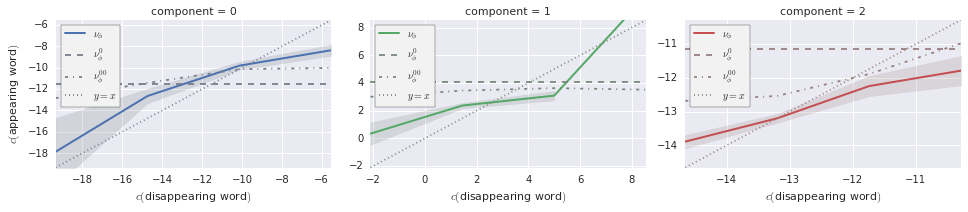

In [21]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation, 'source', 'destination')
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.2 On the features we expose in the paper

Compute the actual PCA

In [22]:
# Compute the PCA.
pcafeatures = tuple(sorted(PAPER_FEATURES))
pcavariations = variations[variations['feature'].map(lambda f: f in pcafeatures)]\
    .pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:".format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 5 components.

Those explain the following variance:
[ 0.55922352  0.19852084  0.1439245   0.03759219  0.03530537]

We're plotting variation for the first 3 components:


,aoa,clustering,frequency,letters_count,orthographical_density,synonyms_count
Component-0,-0.740841,-0.080510,0.279592,-0.555738,0.240102,0.002562
Component-1,0.502666,0.119547,-0.332317,-0.753693,0.233554,0.000267
Component-2,-0.431182,0.059746,-0.892867,0.111890,-0.011960,0.025265


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [23]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution.components(component, pca, pcafeatures)
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'component': component,
                         'source': source,
                         'destination': destination,
                         'h0': substitution.component_average(component, pca, pcafeatures),
                         'h0n': substitution.component_average(component, pca, pcafeatures,
                                                               source_synonyms=True)})

original_component_variations = pd.DataFrame(data)
del data

  0% (    1 of 37155) |           | Elapsed Time: 0:00:13 ETA:  5 days, 22:09:13

  0% (  100 of 37155) |                    | Elapsed Time: 0:00:14 ETA:  0:06:02

  0% (  206 of 37155) |                    | Elapsed Time: 0:00:15 ETA:  0:05:48

  0% (  305 of 37155) |                    | Elapsed Time: 0:00:16 ETA:  0:05:52

  1% (  395 of 37155) |                    | Elapsed Time: 0:00:17 ETA:  0:06:01

  1% (  465 of 37155) |                    | Elapsed Time: 0:00:18 ETA:  0:05:53

  1% (  584 of 37155) |                    | Elapsed Time: 0:00:19 ETA:  0:05:40

  1% (  703 of 37155) |                    | Elapsed Time: 0:00:20 ETA:  0:05:31

  2% (  809 of 37155) |                    | Elapsed Time: 0:00:21 ETA:  0:05:30

  2% (  929 of 37155) |                    | Elapsed Time: 0:00:22 ETA:  0:05:20

  2% ( 1052 of 37155) |                    | Elapsed Time: 0:00:23 ETA:  0:05:12

  3% ( 1186 of 37155) |                    | Elapsed Time: 0:00:24 ETA:  0:04:58

  3% ( 1303 of 37155) |                    | Elapsed Time: 0:00:25 ETA:  0:04:47

  3% ( 1394 of 37155) |                    | Elapsed Time: 0:00:26 ETA:  0:04:40

  3% ( 1477 of 37155) |                    | Elapsed Time: 0:00:27 ETA:  0:04:51

  4% ( 1547 of 37155) |                    | Elapsed Time: 0:00:28 ETA:  0:05:09

  4% ( 1612 of 37155) |                    | Elapsed Time: 0:00:29 ETA:  0:05:25

  4% ( 1679 of 37155) |                    | Elapsed Time: 0:00:30 ETA:  0:05:49

  4% ( 1732 of 37155) |                    | Elapsed Time: 0:00:31 ETA:  0:06:10

  4% ( 1813 of 37155) |                    | Elapsed Time: 0:00:32 ETA:  0:06:32

  5% ( 1858 of 37155) |#                   | Elapsed Time: 0:00:32 ETA:  0:06:54

  5% ( 1961 of 37155) |#                   | Elapsed Time: 0:00:33 ETA:  0:07:03

  5% ( 2059 of 37155) |#                   | Elapsed Time: 0:00:34 ETA:  0:07:18

  5% ( 2176 of 37155) |#                   | Elapsed Time: 0:00:35 ETA:  0:06:54

  6% ( 2296 of 37155) |#                   | Elapsed Time: 0:00:36 ETA:  0:06:23

  6% ( 2323 of 37155) |#                   | Elapsed Time: 0:00:36 ETA:  0:06:05

  6% ( 2470 of 37155) |#                   | Elapsed Time: 0:00:37 ETA:  0:05:22

  7% ( 2609 of 37155) |#                   | Elapsed Time: 0:00:38 ETA:  0:04:45

  7% ( 2748 of 37155) |#                   | Elapsed Time: 0:00:39 ETA:  0:04:24

  7% ( 2787 of 37155) |#                   | Elapsed Time: 0:00:40 ETA:  0:04:22

  7% ( 2920 of 37155) |#                   | Elapsed Time: 0:00:41 ETA:  0:04:12

  8% ( 3044 of 37155) |#                   | Elapsed Time: 0:00:42 ETA:  0:04:03

  8% ( 3176 of 37155) |#                   | Elapsed Time: 0:00:43 ETA:  0:03:58

  8% ( 3252 of 37155) |#                   | Elapsed Time: 0:00:43 ETA:  0:03:54

  9% ( 3377 of 37155) |#                   | Elapsed Time: 0:00:44 ETA:  0:03:55

  9% ( 3489 of 37155) |#                   | Elapsed Time: 0:00:45 ETA:  0:04:03

  9% ( 3604 of 37155) |#                   | Elapsed Time: 0:00:46 ETA:  0:04:09

  9% ( 3690 of 37155) |#                   | Elapsed Time: 0:00:47 ETA:  0:04:25

 10% ( 3716 of 37155) |##                  | Elapsed Time: 0:00:47 ETA:  0:04:25

 10% ( 3847 of 37155) |##                  | Elapsed Time: 0:00:48 ETA:  0:04:25

 10% ( 3937 of 37155) |##                  | Elapsed Time: 0:00:49 ETA:  0:04:36

 10% ( 4027 of 37155) |##                  | Elapsed Time: 0:00:50 ETA:  0:04:51

 11% ( 4144 of 37155) |##                  | Elapsed Time: 0:00:51 ETA:  0:04:52

 11% ( 4180 of 37155) |##                  | Elapsed Time: 0:00:52 ETA:  0:04:56

 11% ( 4287 of 37155) |##                  | Elapsed Time: 0:00:53 ETA:  0:04:57

 11% ( 4389 of 37155) |##                  | Elapsed Time: 0:00:54 ETA:  0:05:01

 12% ( 4492 of 37155) |##                  | Elapsed Time: 0:00:55 ETA:  0:04:53

 12% ( 4599 of 37155) |##                  | Elapsed Time: 0:00:56 ETA:  0:04:53

 12% ( 4645 of 37155) |##                  | Elapsed Time: 0:00:56 ETA:  0:05:04

 12% ( 4739 of 37155) |##                  | Elapsed Time: 0:00:57 ETA:  0:05:02

 12% ( 4828 of 37155) |##                  | Elapsed Time: 0:00:58 ETA:  0:05:01

 13% ( 4934 of 37155) |##                  | Elapsed Time: 0:00:59 ETA:  0:05:05

 13% ( 5026 of 37155) |##                  | Elapsed Time: 0:01:00 ETA:  0:05:12

 13% ( 5109 of 37155) |##                  | Elapsed Time: 0:01:01 ETA:  0:05:13

 14% ( 5202 of 37155) |##                  | Elapsed Time: 0:01:02 ETA:  0:05:16

 14% ( 5285 of 37155) |##                  | Elapsed Time: 0:01:03 ETA:  0:05:24

 14% ( 5380 of 37155) |##                  | Elapsed Time: 0:01:04 ETA:  0:05:29

 14% ( 5484 of 37155) |##                  | Elapsed Time: 0:01:05 ETA:  0:05:25

 15% ( 5574 of 37155) |###                 | Elapsed Time: 0:01:06 ETA:  0:05:22

 15% ( 5676 of 37155) |###                 | Elapsed Time: 0:01:07 ETA:  0:05:15

 15% ( 5781 of 37155) |###                 | Elapsed Time: 0:01:08 ETA:  0:05:14

 15% ( 5884 of 37155) |###                 | Elapsed Time: 0:01:09 ETA:  0:05:08

 16% ( 5989 of 37155) |###                 | Elapsed Time: 0:01:10 ETA:  0:05:07

 16% ( 6038 of 37155) |###                 | Elapsed Time: 0:01:10 ETA:  0:05:04

 16% ( 6140 of 37155) |###                 | Elapsed Time: 0:01:11 ETA:  0:04:54

 16% ( 6260 of 37155) |###                 | Elapsed Time: 0:01:12 ETA:  0:04:43

 17% ( 6372 of 37155) |###                 | Elapsed Time: 0:01:13 ETA:  0:04:39

 17% ( 6482 of 37155) |###                 | Elapsed Time: 0:01:14 ETA:  0:04:34

 17% ( 6503 of 37155) |###                 | Elapsed Time: 0:01:15 ETA:  0:04:38

 17% ( 6594 of 37155) |###                 | Elapsed Time: 0:01:16 ETA:  0:04:42

 18% ( 6693 of 37155) |###                 | Elapsed Time: 0:01:17 ETA:  0:04:43

 18% ( 6790 of 37155) |###                 | Elapsed Time: 0:01:18 ETA:  0:04:46

 18% ( 6870 of 37155) |###                 | Elapsed Time: 0:01:19 ETA:  0:04:54

 18% ( 6967 of 37155) |###                 | Elapsed Time: 0:01:20 ETA:  0:05:08

 19% ( 7077 of 37155) |###                 | Elapsed Time: 0:01:21 ETA:  0:05:08

 19% ( 7193 of 37155) |###                 | Elapsed Time: 0:01:22 ETA:  0:05:04

 19% ( 7294 of 37155) |###                 | Elapsed Time: 0:01:23 ETA:  0:04:55

 19% ( 7408 of 37155) |###                 | Elapsed Time: 0:01:24 ETA:  0:04:44

 20% ( 7431 of 37155) |####                | Elapsed Time: 0:01:24 ETA:  0:04:41

 20% ( 7527 of 37155) |####                | Elapsed Time: 0:01:25 ETA:  0:04:41

 20% ( 7643 of 37155) |####                | Elapsed Time: 0:01:26 ETA:  0:04:23

 20% ( 7744 of 37155) |####                | Elapsed Time: 0:01:27 ETA:  0:04:18

 21% ( 7859 of 37155) |####                | Elapsed Time: 0:01:28 ETA:  0:04:14

 21% ( 7896 of 37155) |####                | Elapsed Time: 0:01:28 ETA:  0:04:13

 21% ( 8007 of 37155) |####                | Elapsed Time: 0:01:29 ETA:  0:04:14

 21% ( 8122 of 37155) |####                | Elapsed Time: 0:01:30 ETA:  0:04:07

 22% ( 8235 of 37155) |####                | Elapsed Time: 0:01:31 ETA:  0:04:06

 22% ( 8337 of 37155) |####                | Elapsed Time: 0:01:32 ETA:  0:04:09

 22% ( 8360 of 37155) |####                | Elapsed Time: 0:01:33 ETA:  0:04:03

 22% ( 8459 of 37155) |####                | Elapsed Time: 0:01:34 ETA:  0:04:09

 23% ( 8549 of 37155) |####                | Elapsed Time: 0:01:35 ETA:  0:04:13

 23% ( 8649 of 37155) |####                | Elapsed Time: 0:01:36 ETA:  0:04:18

 23% ( 8740 of 37155) |####                | Elapsed Time: 0:01:37 ETA:  0:04:26

 23% ( 8825 of 37155) |####                | Elapsed Time: 0:01:37 ETA:  0:04:27

 24% ( 8942 of 37155) |####                | Elapsed Time: 0:01:38 ETA:  0:04:25

 24% ( 9055 of 37155) |####                | Elapsed Time: 0:01:39 ETA:  0:04:24

 24% ( 9178 of 37155) |####                | Elapsed Time: 0:01:40 ETA:  0:04:13

 25% ( 9289 of 37155) |#####               | Elapsed Time: 0:01:41 ETA:  0:04:06

 25% ( 9431 of 37155) |#####               | Elapsed Time: 0:01:42 ETA:  0:03:49

 25% ( 9549 of 37155) |#####               | Elapsed Time: 0:01:43 ETA:  0:03:39

 25% ( 9642 of 37155) |#####               | Elapsed Time: 0:01:44 ETA:  0:03:41

 26% ( 9726 of 37155) |#####               | Elapsed Time: 0:01:45 ETA:  0:03:42

 26% ( 9754 of 37155) |#####               | Elapsed Time: 0:01:46 ETA:  0:03:42

 26% ( 9844 of 37155) |#####               | Elapsed Time: 0:01:47 ETA:  0:03:51

 26% ( 9959 of 37155) |#####               | Elapsed Time: 0:01:48 ETA:  0:03:49

 27% (10085 of 37155) |#####               | Elapsed Time: 0:01:49 ETA:  0:03:47

 27% (10218 of 37155) |#####               | Elapsed Time: 0:01:50 ETA:  0:04:00

 27% (10338 of 37155) |#####               | Elapsed Time: 0:01:51 ETA:  0:03:57

 28% (10449 of 37155) |#####               | Elapsed Time: 0:01:52 ETA:  0:03:48

 28% (10548 of 37155) |#####               | Elapsed Time: 0:01:53 ETA:  0:03:41

 28% (10683 of 37155) |#####               | Elapsed Time: 0:01:54 ETA:  0:03:29

 29% (10814 of 37155) |#####               | Elapsed Time: 0:01:55 ETA:  0:03:21

 29% (10920 of 37155) |#####               | Elapsed Time: 0:01:56 ETA:  0:03:28

 29% (11022 of 37155) |#####               | Elapsed Time: 0:01:57 ETA:  0:03:35

 30% (11147 of 37155) |######              | Elapsed Time: 0:01:58 ETA:  0:03:40

 30% (11252 of 37155) |######              | Elapsed Time: 0:01:59 ETA:  0:03:42

 30% (11343 of 37155) |######              | Elapsed Time: 0:02:00 ETA:  0:03:44

 30% (11464 of 37155) |######              | Elapsed Time: 0:02:01 ETA:  0:03:38

 31% (11588 of 37155) |######              | Elapsed Time: 0:02:02 ETA:  0:03:34

 31% (11611 of 37155) |######              | Elapsed Time: 0:02:02 ETA:  0:03:43

 31% (11747 of 37155) |######              | Elapsed Time: 0:02:03 ETA:  0:03:29

 31% (11888 of 37155) |######              | Elapsed Time: 0:02:04 ETA:  0:03:13

 32% (12016 of 37155) |######              | Elapsed Time: 0:02:05 ETA:  0:03:03

 32% (12076 of 37155) |######              | Elapsed Time: 0:02:06 ETA:  0:03:01

 32% (12181 of 37155) |######              | Elapsed Time: 0:02:07 ETA:  0:03:00

 33% (12277 of 37155) |######              | Elapsed Time: 0:02:08 ETA:  0:02:58

 33% (12380 of 37155) |######              | Elapsed Time: 0:02:09 ETA:  0:03:04

 33% (12505 of 37155) |######              | Elapsed Time: 0:02:10 ETA:  0:03:03

 33% (12540 of 37155) |######              | Elapsed Time: 0:02:10 ETA:  0:03:01

 34% (12646 of 37155) |######              | Elapsed Time: 0:02:11 ETA:  0:03:10

 34% (12793 of 37155) |######              | Elapsed Time: 0:02:12 ETA:  0:03:07

 34% (12943 of 37155) |######              | Elapsed Time: 0:02:13 ETA:  0:02:58

 35% (13005 of 37155) |#######             | Elapsed Time: 0:02:14 ETA:  0:02:58

 35% (13084 of 37155) |#######             | Elapsed Time: 0:02:15 ETA:  0:03:06

 35% (13162 of 37155) |#######             | Elapsed Time: 0:02:16 ETA:  0:03:12

 35% (13261 of 37155) |#######             | Elapsed Time: 0:02:17 ETA:  0:03:15

 35% (13347 of 37155) |#######             | Elapsed Time: 0:02:18 ETA:  0:03:29

 36% (13422 of 37155) |#######             | Elapsed Time: 0:02:19 ETA:  0:03:42

 36% (13469 of 37155) |#######             | Elapsed Time: 0:02:19 ETA:  0:03:46

 36% (13571 of 37155) |#######             | Elapsed Time: 0:02:20 ETA:  0:04:06

 36% (13678 of 37155) |#######             | Elapsed Time: 0:02:21 ETA:  0:04:27

 37% (13757 of 37155) |#######             | Elapsed Time: 0:02:22 ETA:  0:04:44

 37% (13849 of 37155) |#######             | Elapsed Time: 0:02:23 ETA:  0:04:35

 37% (13934 of 37155) |#######             | Elapsed Time: 0:02:24 ETA:  0:04:19

 37% (14064 of 37155) |#######             | Elapsed Time: 0:02:25 ETA:  0:03:58

 38% (14177 of 37155) |#######             | Elapsed Time: 0:02:26 ETA:  0:03:45

 38% (14259 of 37155) |#######             | Elapsed Time: 0:02:27 ETA:  0:03:41

 38% (14341 of 37155) |#######             | Elapsed Time: 0:02:28 ETA:  0:03:46

 38% (14398 of 37155) |#######             | Elapsed Time: 0:02:29 ETA:  0:03:43

 39% (14497 of 37155) |#######             | Elapsed Time: 0:02:30 ETA:  0:03:46

 39% (14587 of 37155) |#######             | Elapsed Time: 0:02:31 ETA:  0:03:40

 39% (14684 of 37155) |#######             | Elapsed Time: 0:02:32 ETA:  0:03:37

 39% (14787 of 37155) |#######             | Elapsed Time: 0:02:33 ETA:  0:03:38

 40% (14862 of 37155) |########            | Elapsed Time: 0:02:34 ETA:  0:03:57

 40% (14953 of 37155) |########            | Elapsed Time: 0:02:35 ETA:  0:04:07

 40% (15060 of 37155) |########            | Elapsed Time: 0:02:36 ETA:  0:03:53

 40% (15148 of 37155) |########            | Elapsed Time: 0:02:37 ETA:  0:03:49

 41% (15259 of 37155) |########            | Elapsed Time: 0:02:38 ETA:  0:03:46

 41% (15327 of 37155) |########            | Elapsed Time: 0:02:38 ETA:  0:03:44

 41% (15429 of 37155) |########            | Elapsed Time: 0:02:39 ETA:  0:03:38

 41% (15520 of 37155) |########            | Elapsed Time: 0:02:40 ETA:  0:03:40

 42% (15618 of 37155) |########            | Elapsed Time: 0:02:41 ETA:  0:03:41

 42% (15742 of 37155) |########            | Elapsed Time: 0:02:42 ETA:  0:03:24

 42% (15791 of 37155) |########            | Elapsed Time: 0:02:43 ETA:  0:03:28

 42% (15895 of 37155) |########            | Elapsed Time: 0:02:44 ETA:  0:03:28

 43% (16001 of 37155) |########            | Elapsed Time: 0:02:45 ETA:  0:03:19

 43% (16101 of 37155) |########            | Elapsed Time: 0:02:46 ETA:  0:03:23

 43% (16196 of 37155) |########            | Elapsed Time: 0:02:47 ETA:  0:03:25

 43% (16256 of 37155) |########            | Elapsed Time: 0:02:48 ETA:  0:03:30

 44% (16395 of 37155) |########            | Elapsed Time: 0:02:49 ETA:  0:03:08

 44% (16524 of 37155) |########            | Elapsed Time: 0:02:50 ETA:  0:02:55

 44% (16578 of 37155) |########            | Elapsed Time: 0:02:51 ETA:  0:03:23

 44% (16613 of 37155) |########            | Elapsed Time: 0:02:52 ETA:  0:03:51

 45% (16720 of 37155) |#########           | Elapsed Time: 0:02:53 ETA:  0:03:44

 45% (16837 of 37155) |#########           | Elapsed Time: 0:02:54 ETA:  0:03:38

 45% (16927 of 37155) |#########           | Elapsed Time: 0:02:55 ETA:  0:03:42

 45% (17035 of 37155) |#########           | Elapsed Time: 0:02:56 ETA:  0:03:35

 46% (17148 of 37155) |#########           | Elapsed Time: 0:02:57 ETA:  0:03:23

 46% (17185 of 37155) |#########           | Elapsed Time: 0:02:57 ETA:  0:03:40

 46% (17298 of 37155) |#########           | Elapsed Time: 0:02:58 ETA:  0:03:47

 46% (17419 of 37155) |#########           | Elapsed Time: 0:02:59 ETA:  0:03:13

 47% (17532 of 37155) |#########           | Elapsed Time: 0:03:00 ETA:  0:02:33

 47% (17649 of 37155) |#########           | Elapsed Time: 0:03:01 ETA:  0:02:38

 47% (17738 of 37155) |#########           | Elapsed Time: 0:03:02 ETA:  0:02:37

 47% (17833 of 37155) |#########           | Elapsed Time: 0:03:03 ETA:  0:02:43

 48% (17964 of 37155) |#########           | Elapsed Time: 0:03:04 ETA:  0:02:35

 48% (18079 of 37155) |#########           | Elapsed Time: 0:03:05 ETA:  0:02:32

 48% (18114 of 37155) |#########           | Elapsed Time: 0:03:06 ETA:  0:02:31

 49% (18220 of 37155) |#########           | Elapsed Time: 0:03:07 ETA:  0:02:37

 49% (18339 of 37155) |#########           | Elapsed Time: 0:03:08 ETA:  0:02:33

 49% (18436 of 37155) |#########           | Elapsed Time: 0:03:09 ETA:  0:02:35

 49% (18530 of 37155) |#########           | Elapsed Time: 0:03:10 ETA:  0:02:41

 50% (18578 of 37155) |##########          | Elapsed Time: 0:03:10 ETA:  0:02:36

 50% (18701 of 37155) |##########          | Elapsed Time: 0:03:11 ETA:  0:02:23

 50% (18811 of 37155) |##########          | Elapsed Time: 0:03:12 ETA:  0:02:30

 50% (18917 of 37155) |##########          | Elapsed Time: 0:03:13 ETA:  0:02:33

 51% (19022 of 37155) |##########          | Elapsed Time: 0:03:14 ETA:  0:02:35

 51% (19042 of 37155) |##########          | Elapsed Time: 0:03:14 ETA:  0:02:36

 51% (19140 of 37155) |##########          | Elapsed Time: 0:03:15 ETA:  0:02:44

 51% (19211 of 37155) |##########          | Elapsed Time: 0:03:16 ETA:  0:02:55

 52% (19326 of 37155) |##########          | Elapsed Time: 0:03:17 ETA:  0:02:45

 52% (19451 of 37155) |##########          | Elapsed Time: 0:03:18 ETA:  0:02:33

 52% (19507 of 37155) |##########          | Elapsed Time: 0:03:19 ETA:  0:02:42

 52% (19605 of 37155) |##########          | Elapsed Time: 0:03:20 ETA:  0:02:46

 53% (19739 of 37155) |##########          | Elapsed Time: 0:03:21 ETA:  0:02:32

 53% (19831 of 37155) |##########          | Elapsed Time: 0:03:22 ETA:  0:02:37

 53% (19936 of 37155) |##########          | Elapsed Time: 0:03:23 ETA:  0:02:34

 53% (19971 of 37155) |##########          | Elapsed Time: 0:03:23 ETA:  0:02:29

 54% (20078 of 37155) |##########          | Elapsed Time: 0:03:24 ETA:  0:02:13

 54% (20195 of 37155) |##########          | Elapsed Time: 0:03:25 ETA:  0:02:11

 54% (20326 of 37155) |##########          | Elapsed Time: 0:03:26 ETA:  0:02:08

 55% (20436 of 37155) |###########         | Elapsed Time: 0:03:27 ETA:  0:02:01

 55% (20554 of 37155) |###########         | Elapsed Time: 0:03:28 ETA:  0:02:07

 55% (20656 of 37155) |###########         | Elapsed Time: 0:03:29 ETA:  0:02:02

 55% (20745 of 37155) |###########         | Elapsed Time: 0:03:30 ETA:  0:02:08

 56% (20868 of 37155) |###########         | Elapsed Time: 0:03:31 ETA:  0:02:03

 56% (20900 of 37155) |###########         | Elapsed Time: 0:03:32 ETA:  0:02:00

 56% (21029 of 37155) |###########         | Elapsed Time: 0:03:33 ETA:  0:01:54

 56% (21137 of 37155) |###########         | Elapsed Time: 0:03:34 ETA:  0:02:02

 57% (21271 of 37155) |###########         | Elapsed Time: 0:03:35 ETA:  0:01:49

 57% (21365 of 37155) |###########         | Elapsed Time: 0:03:35 ETA:  0:01:49

 57% (21478 of 37155) |###########         | Elapsed Time: 0:03:37 ETA:  0:01:55

 57% (21534 of 37155) |###########         | Elapsed Time: 0:03:38 ETA:  0:02:12

 58% (21617 of 37155) |###########         | Elapsed Time: 0:03:39 ETA:  0:02:13

 58% (21717 of 37155) |###########         | Elapsed Time: 0:03:40 ETA:  0:02:22

 58% (21829 of 37155) |###########         | Elapsed Time: 0:03:41 ETA:  0:02:18

 59% (21953 of 37155) |###########         | Elapsed Time: 0:03:42 ETA:  0:02:19

 59% (22090 of 37155) |###########         | Elapsed Time: 0:03:43 ETA:  0:02:08

 59% (22213 of 37155) |###########         | Elapsed Time: 0:03:44 ETA:  0:02:11

 60% (22293 of 37155) |############        | Elapsed Time: 0:03:44 ETA:  0:02:11

 60% (22412 of 37155) |############        | Elapsed Time: 0:03:45 ETA:  0:02:03

 60% (22519 of 37155) |############        | Elapsed Time: 0:03:46 ETA:  0:01:44

 60% (22633 of 37155) |############        | Elapsed Time: 0:03:47 ETA:  0:01:33

 61% (22758 of 37155) |############        | Elapsed Time: 0:03:49 ETA:  0:01:27

 61% (22867 of 37155) |############        | Elapsed Time: 0:03:50 ETA:  0:01:31

 61% (22995 of 37155) |############        | Elapsed Time: 0:03:51 ETA:  0:01:33

 62% (23099 of 37155) |############        | Elapsed Time: 0:03:52 ETA:  0:01:38

 62% (23222 of 37155) |############        | Elapsed Time: 0:03:53 ETA:  0:01:41

 62% (23358 of 37155) |############        | Elapsed Time: 0:03:54 ETA:  0:01:28

 63% (23484 of 37155) |############        | Elapsed Time: 0:03:55 ETA:  0:01:22

 63% (23598 of 37155) |############        | Elapsed Time: 0:03:56 ETA:  0:01:20

 63% (23687 of 37155) |############        | Elapsed Time: 0:03:56 ETA:  0:01:21

 64% (23798 of 37155) |############        | Elapsed Time: 0:03:57 ETA:  0:01:20

 64% (23892 of 37155) |############        | Elapsed Time: 0:03:58 ETA:  0:01:31

 64% (23975 of 37155) |############        | Elapsed Time: 0:03:59 ETA:  0:01:38

 64% (24113 of 37155) |############        | Elapsed Time: 0:04:01 ETA:  0:01:24

 65% (24151 of 37155) |#############       | Elapsed Time: 0:04:01 ETA:  0:01:23

 65% (24253 of 37155) |#############       | Elapsed Time: 0:04:02 ETA:  0:01:34

 65% (24368 of 37155) |#############       | Elapsed Time: 0:04:03 ETA:  0:01:37

 65% (24485 of 37155) |#############       | Elapsed Time: 0:04:04 ETA:  0:01:35

 66% (24616 of 37155) |#############       | Elapsed Time: 0:04:05 ETA:  0:01:35

 66% (24733 of 37155) |#############       | Elapsed Time: 0:04:06 ETA:  0:01:24

 66% (24813 of 37155) |#############       | Elapsed Time: 0:04:07 ETA:  0:01:25

 67% (24905 of 37155) |#############       | Elapsed Time: 0:04:08 ETA:  0:01:43

 67% (25017 of 37155) |#############       | Elapsed Time: 0:04:09 ETA:  0:01:43

 67% (25080 of 37155) |#############       | Elapsed Time: 0:04:10 ETA:  0:01:38

 67% (25202 of 37155) |#############       | Elapsed Time: 0:04:11 ETA:  0:01:34

 68% (25305 of 37155) |#############       | Elapsed Time: 0:04:12 ETA:  0:01:39

 68% (25411 of 37155) |#############       | Elapsed Time: 0:04:13 ETA:  0:01:40

 68% (25517 of 37155) |#############       | Elapsed Time: 0:04:14 ETA:  0:01:40

 68% (25545 of 37155) |#############       | Elapsed Time: 0:04:14 ETA:  0:01:53

 69% (25644 of 37155) |#############       | Elapsed Time: 0:04:15 ETA:  0:01:43

 69% (25755 of 37155) |#############       | Elapsed Time: 0:04:16 ETA:  0:01:34

 69% (25870 of 37155) |#############       | Elapsed Time: 0:04:17 ETA:  0:01:32

 69% (25978 of 37155) |#############       | Elapsed Time: 0:04:18 ETA:  0:01:33

 70% (26009 of 37155) |##############      | Elapsed Time: 0:04:18 ETA:  0:01:36

 70% (26094 of 37155) |##############      | Elapsed Time: 0:04:19 ETA:  0:01:44

 70% (26148 of 37155) |##############      | Elapsed Time: 0:04:20 ETA:  0:02:08

 70% (26242 of 37155) |##############      | Elapsed Time: 0:04:21 ETA:  0:02:14

 70% (26354 of 37155) |##############      | Elapsed Time: 0:04:22 ETA:  0:01:56

 71% (26473 of 37155) |##############      | Elapsed Time: 0:04:23 ETA:  0:01:45

 71% (26553 of 37155) |##############      | Elapsed Time: 0:04:24 ETA:  0:01:59

 71% (26650 of 37155) |##############      | Elapsed Time: 0:04:25 ETA:  0:02:06

 72% (26752 of 37155) |##############      | Elapsed Time: 0:04:26 ETA:  0:02:09

 72% (26848 of 37155) |##############      | Elapsed Time: 0:04:27 ETA:  0:02:12

 72% (26938 of 37155) |##############      | Elapsed Time: 0:04:28 ETA:  0:02:03

 72% (27061 of 37155) |##############      | Elapsed Time: 0:04:29 ETA:  0:01:32

 73% (27160 of 37155) |##############      | Elapsed Time: 0:04:30 ETA:  0:01:29

 73% (27273 of 37155) |##############      | Elapsed Time: 0:04:31 ETA:  0:01:28

 73% (27358 of 37155) |##############      | Elapsed Time: 0:04:32 ETA:  0:01:41

 73% (27402 of 37155) |##############      | Elapsed Time: 0:04:33 ETA:  0:01:31

 74% (27499 of 37155) |##############      | Elapsed Time: 0:04:34 ETA:  0:01:30

 74% (27625 of 37155) |##############      | Elapsed Time: 0:04:35 ETA:  0:01:19

 74% (27733 of 37155) |##############      | Elapsed Time: 0:04:36 ETA:  0:01:13

 74% (27787 of 37155) |##############      | Elapsed Time: 0:04:37 ETA:  0:01:32

 75% (27867 of 37155) |###############     | Elapsed Time: 0:04:37 ETA:  0:01:38

 75% (27984 of 37155) |###############     | Elapsed Time: 0:04:38 ETA:  0:01:28

 75% (28116 of 37155) |###############     | Elapsed Time: 0:04:39 ETA:  0:01:19

 75% (28226 of 37155) |###############     | Elapsed Time: 0:04:40 ETA:  0:01:08

 76% (28331 of 37155) |###############     | Elapsed Time: 0:04:41 ETA:  0:01:02

 76% (28448 of 37155) |###############     | Elapsed Time: 0:04:42 ETA:  0:00:54

 76% (28538 of 37155) |###############     | Elapsed Time: 0:04:43 ETA:  0:01:07

 77% (28655 of 37155) |###############     | Elapsed Time: 0:04:44 ETA:  0:01:02

 77% (28763 of 37155) |###############     | Elapsed Time: 0:04:45 ETA:  0:00:41

 77% (28796 of 37155) |###############     | Elapsed Time: 0:04:46 ETA:  0:00:41

 77% (28890 of 37155) |###############     | Elapsed Time: 0:04:47 ETA:  0:00:48

 78% (28999 of 37155) |###############     | Elapsed Time: 0:04:48 ETA:  0:00:56

 78% (29095 of 37155) |###############     | Elapsed Time: 0:04:49 ETA:  0:01:01

 78% (29221 of 37155) |###############     | Elapsed Time: 0:04:50 ETA:  0:00:57

 78% (29260 of 37155) |###############     | Elapsed Time: 0:04:50 ETA:  0:01:01

 78% (29341 of 37155) |###############     | Elapsed Time: 0:04:51 ETA:  0:01:16

 79% (29438 of 37155) |###############     | Elapsed Time: 0:04:52 ETA:  0:01:24

 79% (29530 of 37155) |###############     | Elapsed Time: 0:04:53 ETA:  0:01:31

 79% (29640 of 37155) |###############     | Elapsed Time: 0:04:54 ETA:  0:01:27

 80% (29724 of 37155) |################    | Elapsed Time: 0:04:55 ETA:  0:01:19

 80% (29836 of 37155) |################    | Elapsed Time: 0:04:56 ETA:  0:01:17

 80% (29961 of 37155) |################    | Elapsed Time: 0:04:57 ETA:  0:01:03

 80% (30068 of 37155) |################    | Elapsed Time: 0:04:58 ETA:  0:01:10

 81% (30169 of 37155) |################    | Elapsed Time: 0:04:59 ETA:  0:01:10

 81% (30189 of 37155) |################    | Elapsed Time: 0:04:59 ETA:  0:00:58

 81% (30275 of 37155) |################    | Elapsed Time: 0:05:00 ETA:  0:01:02

 81% (30379 of 37155) |################    | Elapsed Time: 0:05:01 ETA:  0:00:56

 81% (30461 of 37155) |################    | Elapsed Time: 0:05:02 ETA:  0:01:07

 82% (30584 of 37155) |################    | Elapsed Time: 0:05:03 ETA:  0:01:00

 82% (30653 of 37155) |################    | Elapsed Time: 0:05:04 ETA:  0:01:04

 82% (30751 of 37155) |################    | Elapsed Time: 0:05:05 ETA:  0:01:16

 82% (30831 of 37155) |################    | Elapsed Time: 0:05:06 ETA:  0:01:28

 83% (30952 of 37155) |################    | Elapsed Time: 0:05:07 ETA:  0:01:17

 83% (31032 of 37155) |################    | Elapsed Time: 0:05:08 ETA:  0:01:15

 83% (31118 of 37155) |################    | Elapsed Time: 0:05:09 ETA:  0:01:01

 84% (31233 of 37155) |################    | Elapsed Time: 0:05:10 ETA:  0:00:57

 84% (31350 of 37155) |################    | Elapsed Time: 0:05:11 ETA:  0:00:42

 84% (31496 of 37155) |################    | Elapsed Time: 0:05:12 ETA:  0:00:32

 85% (31582 of 37155) |#################   | Elapsed Time: 0:05:13 ETA:  0:00:37

 85% (31696 of 37155) |#################   | Elapsed Time: 0:05:14 ETA:  0:00:26

 85% (31777 of 37155) |#################   | Elapsed Time: 0:05:15 ETA:  0:00:42

 85% (31892 of 37155) |#################   | Elapsed Time: 0:05:16 ETA:  0:00:26

 86% (31983 of 37155) |#################   | Elapsed Time: 0:05:17 ETA:  0:00:37

 86% (32047 of 37155) |#################   | Elapsed Time: 0:05:18 ETA:  0:00:41

 86% (32164 of 37155) |#################   | Elapsed Time: 0:05:19 ETA:  0:00:40

 86% (32263 of 37155) |#################   | Elapsed Time: 0:05:20 ETA:  0:01:01

 87% (32378 of 37155) |#################   | Elapsed Time: 0:05:21 ETA:  0:00:44

 87% (32511 of 37155) |#################   | Elapsed Time: 0:05:22 ETA:  0:00:35

 87% (32644 of 37155) |#################   | Elapsed Time: 0:05:23 ETA:  0:00:13

 88% (32723 of 37155) |#################   | Elapsed Time: 0:05:24 ETA:  0:00:27

 88% (32814 of 37155) |#################   | Elapsed Time: 0:05:25 ETA:  0:00:26

 88% (32953 of 37155) |#################   | Elapsed Time: 0:05:26 ETA:  0:00:09

 88% (32976 of 37155) |#################   | Elapsed Time: 0:05:26 ETA:  0:00:16

 88% (33067 of 37155) |#################   | Elapsed Time: 0:05:27 ETA:  0:00:19

 89% (33161 of 37155) |#################   | Elapsed Time: 0:05:28 ETA:  0:00:27

 89% (33265 of 37155) |#################   | Elapsed Time: 0:05:29 ETA:  0:00:30

 89% (33349 of 37155) |#################   | Elapsed Time: 0:05:30 ETA:  0:00:41

 90% (33440 of 37155) |##################  | Elapsed Time: 0:05:31 ETA:  0:00:56

 90% (33530 of 37155) |##################  | Elapsed Time: 0:05:32 ETA:  0:00:50

 90% (33636 of 37155) |##################  | Elapsed Time: 0:05:33 ETA:  0:00:42

 90% (33740 of 37155) |##################  | Elapsed Time: 0:05:34 ETA:  0:00:58

 91% (33830 of 37155) |##################  | Elapsed Time: 0:05:35 ETA:  0:00:56

 91% (33904 of 37155) |##################  | Elapsed Time: 0:05:36 ETA:  0:00:47

 91% (33990 of 37155) |##################  | Elapsed Time: 0:05:37 ETA:  0:00:52

 91% (34110 of 37155) |##################  | Elapsed Time: 0:05:38 ETA:  0:00:43

 92% (34227 of 37155) |##################  | Elapsed Time: 0:05:39 ETA:  0:00:28

 92% (34339 of 37155) |##################  | Elapsed Time: 0:05:40 ETA:  0:00:20

 92% (34369 of 37155) |##################  | Elapsed Time: 0:05:40 ETA:  0:00:14

 92% (34465 of 37155) |##################  | Elapsed Time: 0:05:41 ETA:  0:00:18

 93% (34563 of 37155) |##################  | Elapsed Time: 0:05:42 ETA:  0:00:19

 93% (34634 of 37155) |##################  | Elapsed Time: 0:05:43 ETA:  0:00:27

 93% (34680 of 37155) |##################  | Elapsed Time: 0:05:44 ETA:  0:00:57

 93% (34720 of 37155) |##################  | Elapsed Time: 0:05:45 ETA:  0:01:20

 93% (34757 of 37155) |##################  | Elapsed Time: 0:05:46 ETA:  0:02:13

 93% (34833 of 37155) |##################  | Elapsed Time: 0:05:47 ETA:  0:02:31

 94% (34942 of 37155) |##################  | Elapsed Time: 0:05:48 ETA:  0:02:32

 94% (35038 of 37155) |##################  | Elapsed Time: 0:05:49 ETA:  0:02:21

 94% (35106 of 37155) |##################  | Elapsed Time: 0:05:50 ETA:  0:02:41

 94% (35195 of 37155) |##################  | Elapsed Time: 0:05:51 ETA:  0:02:48

 95% (35298 of 37155) |################### | Elapsed Time: 0:05:52 ETA:  0:02:16

 95% (35429 of 37155) |################### | Elapsed Time: 0:05:53 ETA:  0:01:19

 95% (35553 of 37155) |################### | Elapsed Time: 0:05:54 ETA:  0:00:34

 96% (35674 of 37155) |################### | Elapsed Time: 0:05:55 ETA:  0:00:00

 96% (35762 of 37155) |################### | Elapsed Time: 0:05:56 ETA:  0:00:00

 96% (35871 of 37155) |################### | Elapsed Time: 0:05:57 ETA:  0:00:00

 96% (35960 of 37155) |################### | Elapsed Time: 0:05:58 ETA:  0:00:00

 97% (36050 of 37155) |################### | Elapsed Time: 0:05:59 ETA:  0:00:00

 97% (36128 of 37155) |################### | Elapsed Time: 0:06:00 ETA:  0:00:00

 97% (36227 of 37155) |################### | Elapsed Time: 0:06:01 ETA:  0:00:00

 97% (36309 of 37155) |################### | Elapsed Time: 0:06:02 ETA:  0:00:04

 98% (36414 of 37155) |################### | Elapsed Time: 0:06:03 ETA:  0:00:11

 98% (36537 of 37155) |################### | Elapsed Time: 0:06:04 ETA:  0:00:09

 98% (36652 of 37155) |################### | Elapsed Time: 0:06:05 ETA:  0:00:12

 98% (36691 of 37155) |################### | Elapsed Time: 0:06:05 ETA:  0:00:15

 99% (36795 of 37155) |################### | Elapsed Time: 0:06:06 ETA:  0:00:07

 99% (36908 of 37155) |################### | Elapsed Time: 0:06:07 ETA:  0:00:00

 99% (37003 of 37155) |################### | Elapsed Time: 0:06:08 ETA:  0:00:00

 99% (37112 of 37155) |################### | Elapsed Time: 0:06:09 ETA:  0:00:00

100% (37155 of 37155) |####################| Elapsed Time: 0:06:09 Time: 0:06:09


Compute cluster averages (so as not to overestimate confidence intervals).

In [24]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'component'], as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components

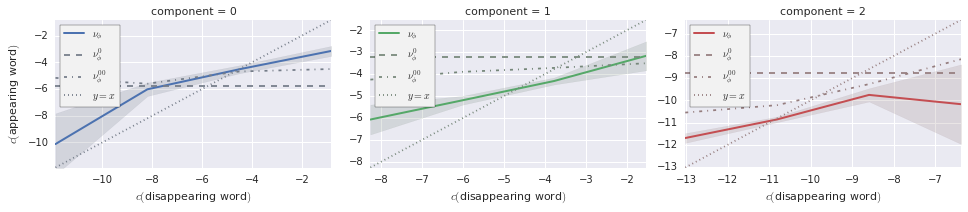

In [25]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation, 'source', 'destination')
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.3 CAVEAT: reduction of the numbers of words and substitutions

As explained above, this PCA analysis can only use words for which *all* the features are defined (in this case, the features listed in `PAPER_FEATURES`). So note the following:

In [26]:
for feature in PAPER_FEATURES:
    print("Feature '{}' is based on {} words."
          .format(feature, len(Substitution._transformed_feature(feature)())))

# Compute the number of words that have all PAPER_FEATURES defined.
words = set()
for tfeature in [Substitution._transformed_feature(feature) for feature in PAPER_FEATURES]:
    words.update(tfeature())

data = dict((feature, []) for feature in PAPER_FEATURES)
words_list = []
for word in words:
    words_list.append(word)
    for feature in PAPER_FEATURES:
        data[feature].append(Substitution._transformed_feature(feature)(word))
wordsdf = pd.DataFrame(data)
wordsdf['words'] = words_list
del words_list, data

print()
print("Among all the set of words used by these features, only {} are used."
      .format(len(wordsdf.dropna())))

print()
print("Similarly, we mined {} (cluster-unique) substitutions, but the PCA is in fact"
      " computed on {} of them (those where all features are defined)."
      .format(len(set(variations['cluster_id'])), len(pcavariations)))

Feature 'frequency' is based on 33450 words.
Feature 'aoa' is based on 30102 words.
Feature 'clustering' is based on 5739 words.
Feature 'letters_count' is based on 42786 words.
Feature 'synonyms_count' is based on 147306 words.
Feature 'orthographical_density' is based on 27751 words.



Among all the set of words used by these features, only 3322 are used.

Similarly, we mined 1561 (cluster-unique) substitutions, but the PCA is in fact computed on 515 of them (those where all features are defined).


The way $\mathcal{H}_0$ and $\mathcal{H}_{00}$ are computed makes them also affected by this.